# インポート

In [399]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

# データの読み込み

## 映画情報

In [400]:
movie = pd.read_pickle('./data/movie.pickle')

In [401]:
movie.head()

mean_review_point  number_of_revier  screening_time  \
0               6.84              44.0           155.0   
1               8.00               1.0           104.0   
2               8.27              11.0           114.0   
3               5.93              14.0           100.0   
4               5.80               5.0           120.0   

                                           genre  movie_id  \
0                     アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942   
1    アクション|ＳＦ|アニメ|シリーズもの|青春もの|学園もの|ＴＶの映画化|漫画の映画化     26788   
2                                 ドラマ|サスペンス|コメディ     25605   
3  アクション|ＳＦ|ファンタジー|アニメ|シリーズもの|ＴＶの映画化|漫画の映画化|３Ｄ映画     24933   
4                   ドラマ|ラブストーリー|青春もの|学園もの|漫画の映画化     23973   

                          movie_title  
0                   シン・エヴァンゲリオン劇場版：||  
1  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション  
2                             メランコリック  
3                       ドラゴンボール超／ブロリー  
4                          ReLIFEリライフ

In [402]:
print(movie.shape)

(25002, 6)


In [403]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_review_point  24988 non-null  float64
 1   number_of_revier   24988 non-null  float64
 2   screening_time     23499 non-null  float64
 3   genre              25002 non-null  object 
 4   movie_id           25002 non-null  int64  
 5   movie_title        25002 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


## ユーザー情報

In [404]:
user = pd.read_pickle('./data/review.pickle')

In [405]:
user.head()

user_id  movie_id                          movie_tile  \
0    20001     25942                   シン・エヴァンゲリオン劇場版：||   
1    20001     26788  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション   
2    20001     25605                             メランコリック   
3    20001     24933                       ドラゴンボール超／ブロリー   
4    20001     23973                          ReLIFEリライフ   

                                       movie_comment  point  
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...      8  
1  空いてそうな時間帯を狙っていきました。時系列的には連続アニメの最新話のあとぐらいの話みたいで...      8  
2  AmazonPrimeで見ました。調べると製作費３００万だそうで。それもあって初めてみる俳優...      8  
3  なお、ドラゴンボールの映画は「神と神」と「復活のF」ぐらいしか見たことがないのでオリジナルの...      6  
4  漫画とアニメ（＋OVA）は全部見てます。で、漫画原作は222話で10冊以上あるのでやもえない...      6

In [406]:
user['user_id'].unique()

array([20001, 20031, 20033, ..., 27960, 27961, 27973])

# Likeの定義

In [407]:
user[user['user_id']==20001].point

0      8
1      8
2      8
3      6
4      6
      ..
174    0
175    8
176    3
177    8
178    0
Name: point, Length: 179, dtype: int64

In [408]:
# ＃ユーザー1の評価平均がマイナス
user[user['user_id']==20001].point.mean()

6.441340782122905

In [409]:
user[user['user_id']==23664].point.mean()

3.769491525423729

In [410]:
user[user['user_id']==23664]

user_id  movie_id         movie_tile  \
224029    23664     26359                罪の声   
224030    23664     23775     この世界の片隅に(2016)   
224031    23664     25942  シン・エヴァンゲリオン劇場版：||   
224032    23664     26149         TENET　テネット   
224033    23664     26254     劇場版　鬼滅の刃　無限列車編   
...         ...       ...                ...   
225794    23664      2066        ミリオンダラー・ホテル   
225795    23664      4453            ドニー・ダーコ   
225796    23664      3104            バニラ・スカイ   
225797    23664      5515           S.W.A.T.   
225798    23664      6382        “アイデンティティー”   

                                            movie_comment  point  
224029  劇場型犯罪という言葉が生まれるきかっけとなったグリコ森永事件。子供の声を使ったとゆーのがすご...      7  
224030  冒頭からスズさんのたたずまいになぜか引き込まれちゃいました。幸せになって欲しいなーってゆう気...      0  
224031  エヴァは昔から見てるんだけど、イマイチ、よくわかんないとゆーか、だからこれまでに色んな人の解...      0  
224032  鑑賞後は、恐らく映画の半分は意味がわかってなかったと思う。でも面白かった。例えるなら、ものす...      7  
224033  子供がハマって観てたのを、横からチラ見してるうちに嫁さんが漫画を買って読みふけるほどハマって...      0  
...                                                   ...    ...  
225794  最初、題名見て「ホテルの映画か～、かったるそーやな」って思ってんけど、なぜかレンタルして観た...      0  
225795  なんか昔読んだ「ライ麦畑でつかまえて」に雰囲気が似てた。ま～ストーリーは全然ちゃうねんけど、...      7  
225796  だいぶ昔にオープン・ユア・アイズ観てんけど、おもろいって事しか覚えてなくて、んでその後これ観...      0  
225797  観てる間はあきひんかったけど、観終わっても何も残らんかってんな～。設定はおもろいねんけど展開...      7  
225798  映画館じゃなくレンタルして観てんけど、めちゃくちゃおもろかった。どんでん返しがあるのはわかっ...      0  

[1770 rows x 5 columns]

## Calculate mean rating per user

In [411]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['point']

MRPU.drop(['movie_id','point'],axis=1, inplace=True)

In [412]:
MRPU.head()

user_id  mean_rating
0    20001     6.441341
1    20031     5.769784
2    20033     6.013530
3    20035     5.559322
4    20036     5.987654

In [413]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])

In [414]:
user.head(5)

user_id  movie_id                          movie_tile  \
0    20001     25942                   シン・エヴァンゲリオン劇場版：||   
1    20001     26788  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション   
2    20001     25605                             メランコリック   
3    20001     24933                       ドラゴンボール超／ブロリー   
4    20001     23973                          ReLIFEリライフ   

                                       movie_comment  point  mean_rating  
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...      8     6.441341  
1  空いてそうな時間帯を狙っていきました。時系列的には連続アニメの最新話のあとぐらいの話みたいで...      8     6.441341  
2  AmazonPrimeで見ました。調べると製作費３００万だそうで。それもあって初めてみる俳優...      8     6.441341  
3  なお、ドラゴンボールの映画は「神と神」と「復活のF」ぐらいしか見たことがないのでオリジナルの...      6     6.441341  
4  漫画とアニメ（＋OVA）は全部見てます。で、漫画原作は222話で10冊以上あるのでやもえない...      6     6.441341

In [415]:
# user = user.drop(user[user.point < user.mean_rating].index)

In [416]:
user[user['user_id']== 20001].head(10)

user_id  movie_id                          movie_tile  \
0    20001     25942                   シン・エヴァンゲリオン劇場版：||   
1    20001     26788  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション   
2    20001     25605                             メランコリック   
3    20001     24933                       ドラゴンボール超／ブロリー   
4    20001     23973                          ReLIFEリライフ   
5    20001     16070                 DRAGONBALLEVOLUTION   
6    20001     22641           イミテーション・ゲーム／エニグマと天才数学者の秘密   
7    20001     22581                             寄生獣　完結編   
8    20001     22169                                 寄生獣   
9    20001     23434                  ＩＡＭＡＨＥＲＯ　アイアムアヒーロー   

                                       movie_comment  point  mean_rating  
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...      8     6.441341  
1  空いてそうな時間帯を狙っていきました。時系列的には連続アニメの最新話のあとぐらいの話みたいで...      8     6.441341  
2  AmazonPrimeで見ました。調べると製作費３００万だそうで。それもあって初めてみる俳優...      8     6.441341  
3  なお、ドラゴンボールの映画は「神と神」と「復活のF」ぐらいしか見たことがないのでオリジナルの...      6     6.441341  
4  漫画とアニメ（＋OVA）は全部見てます。で、漫画原作は222話で10冊以上あるのでやもえない...      6     6.441341  
5  酷い出来だという事は調べたついていたので全く期待もせずドラゴンボールである事も忘れて鑑賞しま...      1     6.441341  
6  暗号キーが毎日変わる上に暗号元の平文の内容が分からないのに解読する為に論理回路もそうだし平文...      8     6.441341  
7  続いてAmazonPrimeで見ました。いろんな意味でテレビ放送できない類の作品になっちゃい...      6     6.441341  
8  AmazonPrimeで見ました。ターミネーター２を撮影する為に寄生獣の版権を買ったという話...      6     6.441341  
9  なかなかのゾンビ映画でした。ゾンビとしての定番をきちんと押さえつついろんなエッセンスを取り入...      8     6.441341

In [417]:
print(user.shape)

(452459, 6)


In [418]:
user = user.rename({'point':'userRating'}, axis='columns')

In [419]:
user.head()

user_id  movie_id                          movie_tile  \
0    20001     25942                   シン・エヴァンゲリオン劇場版：||   
1    20001     26788  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション   
2    20001     25605                             メランコリック   
3    20001     24933                       ドラゴンボール超／ブロリー   
4    20001     23973                          ReLIFEリライフ   

                                       movie_comment  userRating  mean_rating  
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...           8     6.441341  
1  空いてそうな時間帯を狙っていきました。時系列的には連続アニメの最新話のあとぐらいの話みたいで...           8     6.441341  
2  AmazonPrimeで見ました。調べると製作費３００万だそうで。それもあって初めてみる俳優...           8     6.441341  
3  なお、ドラゴンボールの映画は「神と神」と「復活のF」ぐらいしか見たことがないのでオリジナルの...           6     6.441341  
4  漫画とアニメ（＋OVA）は全部見てます。で、漫画原作は222話で10冊以上あるのでやもえない...           6     6.441341

## Combine two datasets

In [420]:
# merge 2 dataset
mergedata = pd.merge(movie,user,on=['movie_id','movie_id'])
mergedata.head(5)

mean_review_point  number_of_revier  screening_time  \
0               6.84              44.0           155.0   
1               6.84              44.0           155.0   
2               6.84              44.0           155.0   
3               6.84              44.0           155.0   
4               6.84              44.0           155.0   

                        genre  movie_id        movie_title  user_id  \
0  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942  シン・エヴァンゲリオン劇場版：||    20001   
1  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942  シン・エヴァンゲリオン劇場版：||    20202   
2  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942  シン・エヴァンゲリオン劇場版：||    20434   
3  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942  シン・エヴァンゲリオン劇場版：||    20857   
4  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942  シン・エヴァンゲリオン劇場版：||    20925   

          movie_tile                                      movie_comment  \
0  シン・エヴァンゲリオン劇場版：||  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...   
1  シン・エヴァンゲリオン劇場版：||  子供たちに誘われて一家総出で見に行ったんですけどね。こんなの見終わってから家族でどういう会話...   
2  シン・エヴァンゲリオン劇場版：||  Ｑを復習せず鑑賞。前半はシンジの鬱にイライラ。ひたすらウザい。それに対し周りの人間が優しすぎ...   
3  シン・エヴァンゲリオン劇場版：||  ほんとに終わったのね。序盤の鬱シンジ、もう笑えたわ、なんか。あと中身28歳見た目14歳アスカ...   
4  シン・エヴァンゲリオン劇場版：||  概ね旧劇場版からさらに踏み込んだ補完版という感じでしたが、こういう落とし方が無難でしたかね。...   

   userRating  mean_rating  
0           8     6.441341  
1           7     6.612227  
2           6     4.667390  
3           8     5.810056  
4           8     5.541467

# Create Crosstable

各ユーザーが好きな映画の詳細を表示する

In [421]:
user_movie = pd.crosstab(mergedata['user_id'], mergedata['movie_title'])
user_movie.head(10)

movie_title  #生きている  (r)adiusラディウス  -less［レス］  -×-（マイナス・カケル・マイナス）  0.5ミリ  \
user_id                                                                    
20001             0              0          0                   0      0   
20031             0              0          0                   0      0   
20033             0              0          0                   0      0   
20035             0              0          0                   0      0   
20036             0              0          0                   0      0   
20037             0              0          0                   0      0   
20039             0              0          0                   0      0   
20040             0              0          0                   0      0   
20041             0              0          0                   0      0   
20042             0              0          0                   0      0   

movie_title  008　皇帝ミッション  009RE:CYBORG  1.0【ワン・ポイント・オー】  100,000年後の安全  \
user_id                                                                 
20001                  0             0                0             0   
20031                  0             0                0             0   
20033                  0             0                0             0   
20035                  0             0                0             0   
20036                  0             0                0             0   
20037                  0             0                0             0   
20039                  0             0                0             0   
20040                  0             0                0             0   
20041                  0             0                0             0   
20042                  0             0                0             0   

movie_title  1000年女王  ...  ＺＯＯ(1985)  ＺＯＯ(2004)  ＺＶＳ　ゾンビVSスナイパー  ［リミット］  \
user_id               ...                                                 
20001              0  ...          0          0               0       0   
20031              0  ...          0          0               0       0   
20033              0  ...          0          0               0       0   
20035              0  ...          0          0               0       0   
20036              0  ...          0          0               0       0   
20037              0  ...          0          0               0       0   
20039              0  ...          0          0               0       0   
20040              0  ...          0          0               0       0   
20041              0  ...          0          0               0       0   
20042              0  ...          1          0               0       0   

movie_title  ｅｋｉｄｅｎ[駅伝]  ｇ＠ｍｅ．(2003)  ｉｆ　もしも・・・・  ｍａｎ－ｈｏｌｅ  ｍｙベスト・フレンズ  \
user_id                                                                  
20001                 0            0           0         0           0   
20031                 0            0           0         0           0   
20033                 0            0           0         0           0   
20035                 0            0           0         0           0   
20036                 0            0           0         0           0   
20037                 0            0           0         0           0   
20039                 0            0           0         0           0   
20040                 0            0           0         0           0   
20041                 0            0           0         0           0   
20042                 0            0           0         0           0   

movie_title  ｓＷｉｎＧｍａＮ  
user_id                
20001               0  
20031               0  
20033               0  
20035               0  
20036               0  
20037               0  
20039               0  
20040               0  
20041               0  
20042               0  

[10 rows x 25000 columns]

In [422]:
user_movie.shape

(4105, 25000)

# 主成分分析
主成分分析は、元の変数を新しい変数のセットに変換します。  
これは、元の変数セットの線形結合です。  
私の主な目標は、クラスタリングと視覚化のためにデータの次元を削減することです  

19255次元を減らす

In [423]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8) # PCAのパラメータのn_componentsに0～1の小数を与えると、int型はその数に主成分分析, 与えた割合以上の情報を保持できるだけの主成分になるよう指定することができます。
pca.fit(user_movie)

PCA(n_components=0.8)

In [93]:
print('寄与率(%): ', pca.explained_variance_ratio_)

寄与率(%):  [0.082808   0.01912598 0.01562444 0.01205317 0.00854838 0.00774042
 0.00756356 0.00743558 0.00677671 0.00633234 0.00612859 0.0056853
 0.0053778  0.00525204 0.00505637 0.00484408 0.00458087 0.00452919
 0.00440473 0.00429399 0.00411947 0.00410381 0.00402737 0.0039422
 0.00389996 0.0038283  0.00372848 0.00370377 0.00361985 0.00358445
 0.00353493 0.00350849 0.00340685 0.00335069 0.00327123 0.0032628
 0.00316617 0.00311702 0.00310504 0.00301081 0.00294744 0.00291036
 0.00287566 0.00285531 0.0028292  0.00280754 0.00273315 0.00272009
 0.00267554 0.00265251 0.00263207 0.00261212 0.00257582 0.00253397
 0.00251201 0.00249086 0.00246087 0.00245815 0.00244939 0.00243594
 0.00241494 0.00238337 0.00236634 0.00232557 0.00232272 0.00229812
 0.00229495 0.0022787  0.00225396 0.00221915 0.00220642 0.00219473
 0.00216935 0.00215058 0.00212851 0.00212209 0.0021101  0.00210165
 0.00209185 0.00208456 0.00207808 0.00206805 0.0020544  0.00203761
 0.00202521 0.00201414 0.00200039 0.00197928 0.00197065 

In [92]:
print('累積寄与率(%): ', np.cumsum(pca.explained_variance_ratio_))

累積寄与率(%):  [0.082808   0.10193398 0.11755842 0.12961159 0.13815997 0.14590039
 0.15346396 0.16089954 0.16767625 0.17400859 0.18013718 0.18582248
 0.19120027 0.19645231 0.20150868 0.20635276 0.21093362 0.21546281
 0.21986754 0.22416154 0.22828101 0.23238482 0.2364122  0.24035439
 0.24425435 0.24808265 0.25181113 0.2555149  0.25913475 0.26271921
 0.26625414 0.26976263 0.27316948 0.27652017 0.2797914  0.2830542
 0.28622037 0.28933739 0.29244243 0.29545324 0.29840068 0.30131104
 0.3041867  0.30704201 0.30987121 0.31267874 0.31541189 0.31813199
 0.32080753 0.32346004 0.32609211 0.32870423 0.33128005 0.33381401
 0.33632602 0.33881688 0.34127775 0.34373589 0.34618528 0.34862122
 0.35103615 0.35341953 0.35578587 0.35811144 0.36043416 0.36273228
 0.36502723 0.36730593 0.3695599  0.37177905 0.37398546 0.37618019
 0.37834954 0.38050013 0.38262864 0.38475072 0.38686083 0.38896247
 0.39105433 0.39313888 0.39521696 0.39728501 0.39933941 0.40137702
 0.40340223 0.40541638 0.40741677 0.40939604 0.41136

In [424]:
print('保たれている情報: ', np.sum(pca.explained_variance_ratio_))
print('主成分の数: ', pca.n_components_)

保たれている情報:  0.800333796694159
主成分の数:  523


523次元まで削減

In [425]:
pca_samples = pca.transform(user_movie)
# 得られた主成分を使って、データセットの次元を削減することができます。
ps = pd.DataFrame(pca_samples)
ps.head()

0         1         2         3         4         5         6    \
0   2.030991 -0.364489 -1.529628 -1.233029  1.077722 -0.075366 -0.652244   
1   0.126200 -0.194981  1.289250  1.034721  0.187746 -0.698291 -0.917196   
2  13.521595 -9.089858 -0.970575  3.320958  2.825404 -4.600102  3.257049   
3  -0.486439 -0.657900 -0.189664 -0.379019  0.086501  0.155161  0.522972   
4  -0.607693 -0.195424  0.752865  0.450551 -0.513106 -0.067380 -0.073742   

        7         8         9    ...       513       514       515       516  \
0  0.575045 -0.049026  0.829338  ... -0.152345 -0.580315  0.311452 -1.180295   
1 -0.105184 -0.078430 -0.401777  ... -0.037940  0.296459  0.277989  0.712287   
2  2.911293  0.843541 -6.399525  ...  0.195400  0.415981 -0.335970  0.086136   
3 -0.048139 -0.223973  0.162434  ... -0.155055  0.281954  0.114694  0.036110   
4  0.337453  0.067853 -0.544803  ... -0.109853 -0.077880  0.234812  0.122146   

        517       518       519       520       521       522  
0  0.903678 -0.760906 -0.546468  0.288263 -0.496752 -0.469577  
1 -0.338590  0.653908  0.062836  0.578428 -0.408250  0.062510  
2  0.780561  0.185093  0.329325  0.100832  0.105916  0.262770  
3  0.318418 -0.088336  0.304491 -0.070891  0.070505  0.236271  
4 -0.001421  0.035877 -0.159199 -0.048009  0.013148  0.072087  

[5 rows x 523 columns]

In [426]:
tocluster = ps.copy()
tocluster.shape

(4105, 523)

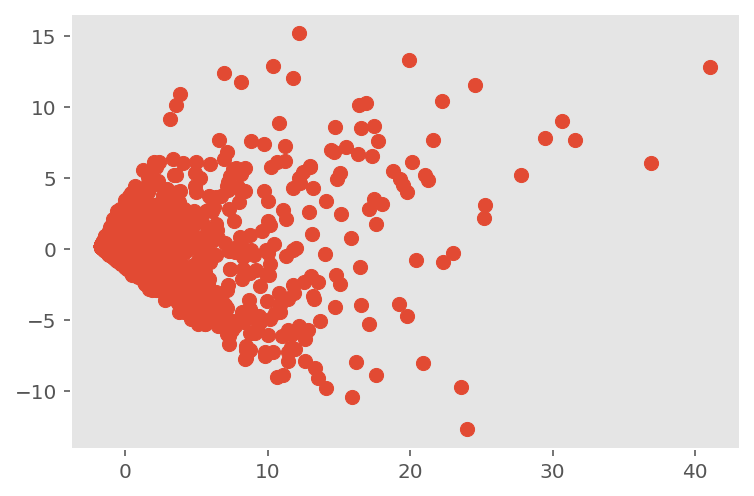

In [427]:
plt.scatter(tocluster[0],tocluster[1],marker='o',s=50)
plt.grid()
plt.show()

/var/folders/g6/qtvrbqf960v1l069d_0yh2lc0000gn/T/ipykernel_74342/2303771990.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


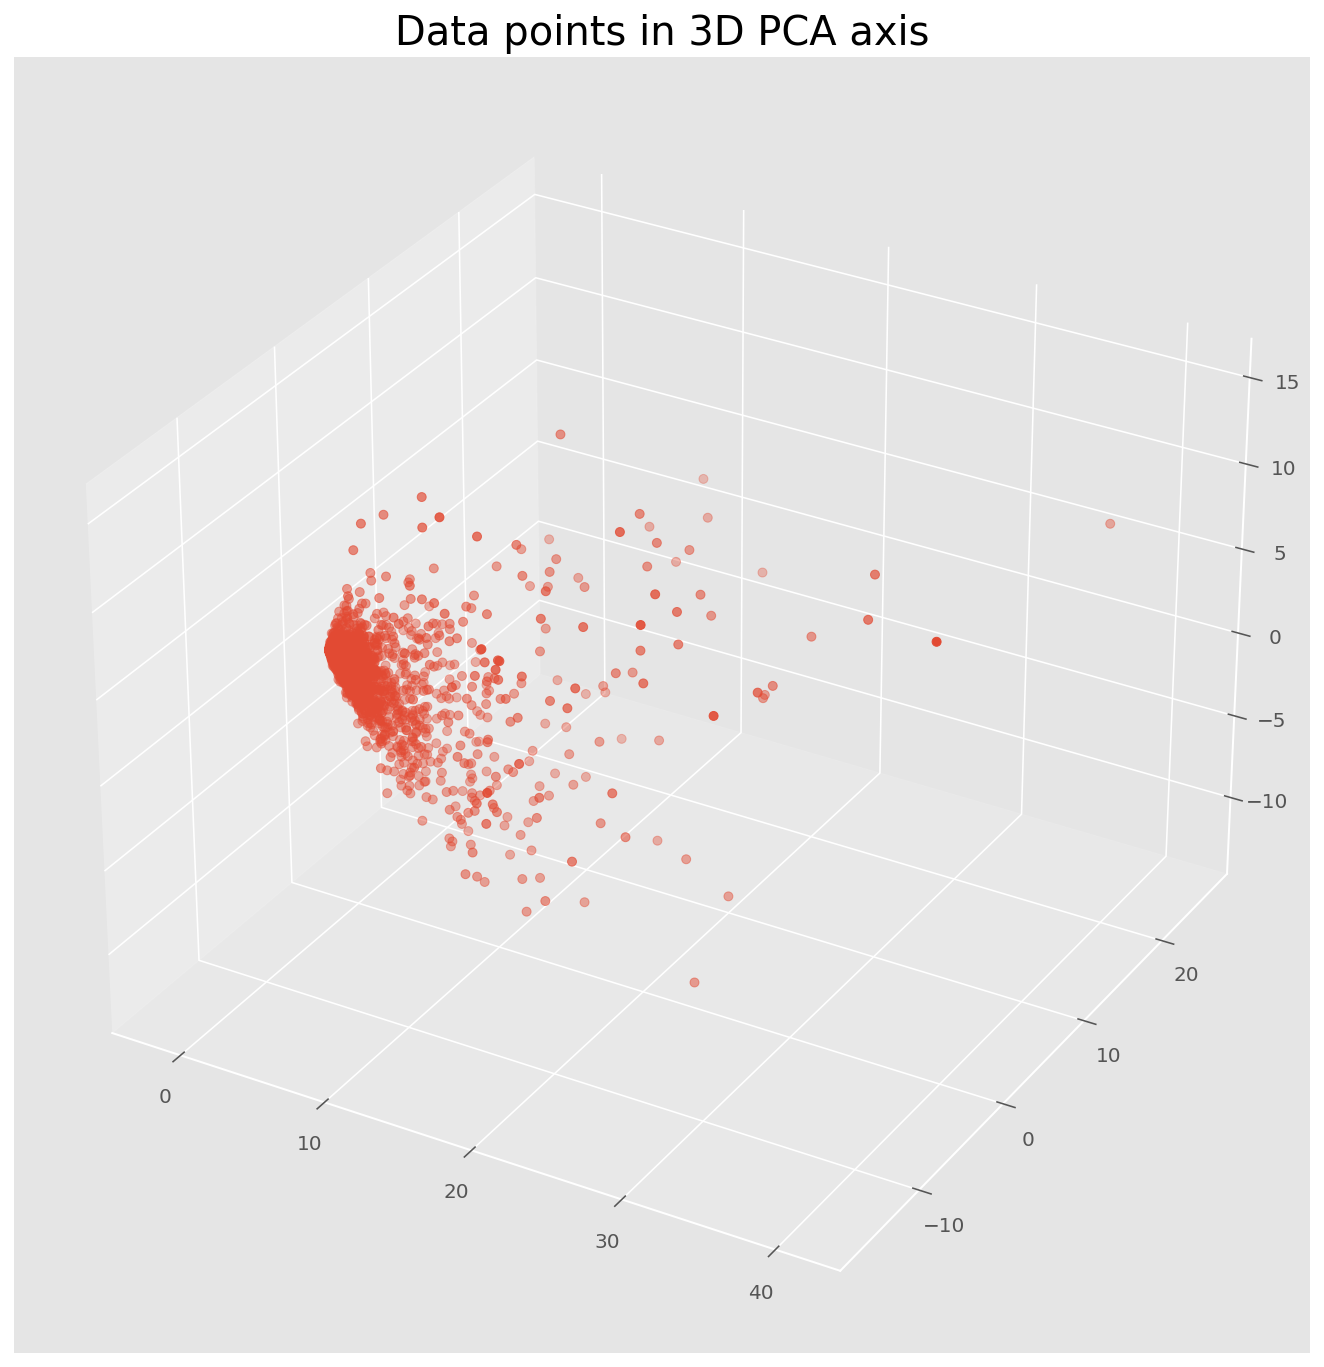

In [428]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

# Selecting number of k

In [430]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scores = []
range_n_clusters = list(range(2,20,1))
inertia_list = np.empty(len(range_n_clusters))
i = 0

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster,)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    i = i + 1
    scores.append(silhouette_score(tocluster, kmeans.labels_))

## inertiaとは

クラスタ内誤差平方和（SSE）  SSEのことを"クラスタの慣性"cluster inertia とも呼ぶらしい ）   
kmeansの最適化において最小化すべき指標で、各クラスター内の二乗誤差のこと。

## エルボー法とは
クラスタごとのSSE値をプロットした図（それだけ）  
SSE値が"ヒジ"のようにガクンと曲がった点（SSE値の低下がサチる場所）が最適なクラスター数とみなす

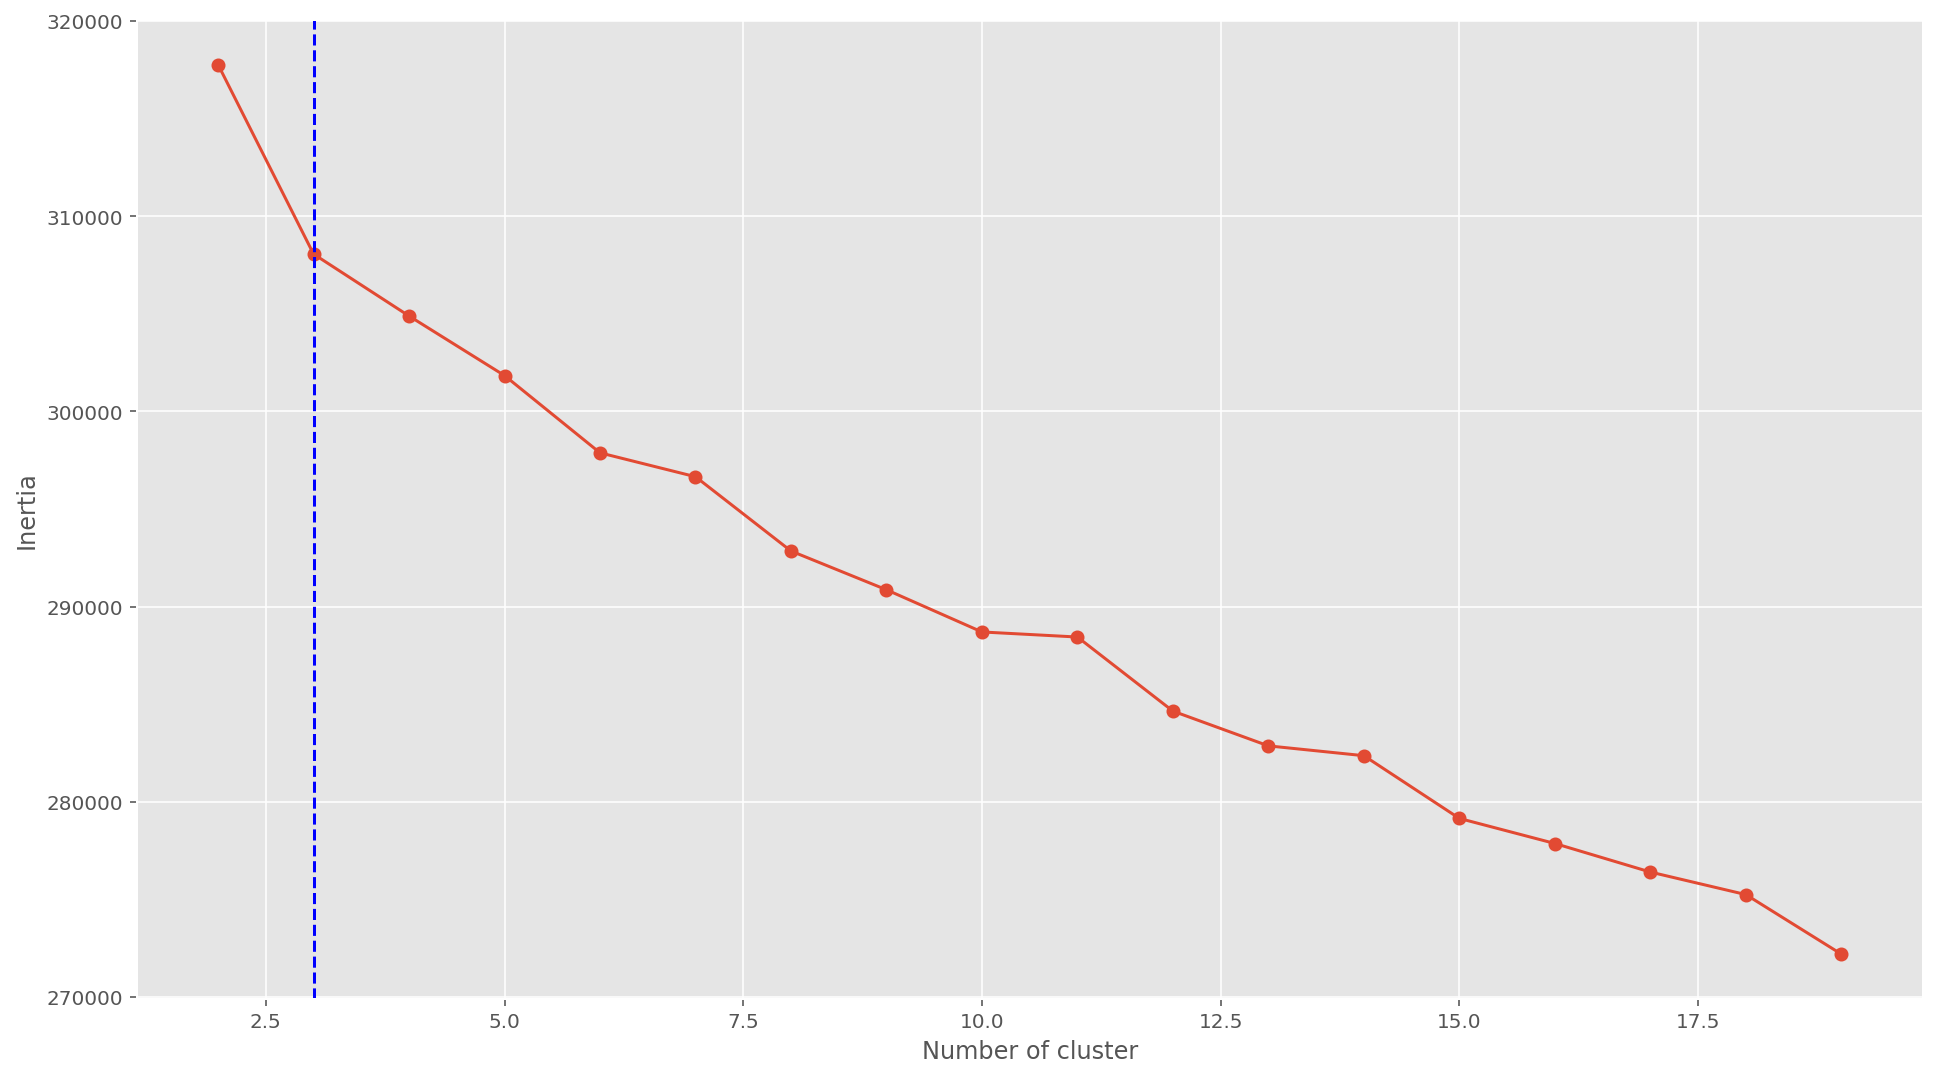

In [432]:
plt.plot(range_n_clusters,inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=3, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

## シルエット分析 Silhouette analysisとは

シルエット分析とは

クラスタ内のサンプルがどの程度密にグループされているか（凝集度）の目安となるグラフを可視化（=パッと見でクラスターが上手くできているかなんとなくわかる）
１つのクラスターが隣接するクラスターとどれくらい離れているかを可視化する  
また、適切なクラスター数がどれくらいかを調べるためにも使える  

For n_clusters = 2 The average silhouette_score is : 0.7218205665118207
For n_clusters = 3 The average silhouette_score is : 0.6436995875646326
For n_clusters = 4 The average silhouette_score is : 0.6013856334614059
For n_clusters = 5 The average silhouette_score is : 0.5789665470656293
For n_clusters = 6 The average silhouette_score is : 0.5651801423006385
For n_clusters = 7 The average silhouette_score is : 0.5643081373646242
For n_clusters = 8 The average silhouette_score is : 0.5493309374812025
For n_clusters = 9 The average silhouette_score is : 0.6456368855259118
For n_clusters = 10 The average silhouette_score is : 0.5479309805755365
For n_clusters = 11 The average silhouette_score is : 0.5772933991346394
For n_clusters = 12 The average silhouette_score is : 0.49766212693515166
For n_clusters = 13 The average silhouette_score is : 0.5080874043084423
For n_clusters = 14 The average silhouette_score is : 0.47454584512246295
For n_clusters = 15 The average silhouette_score is : 0.5

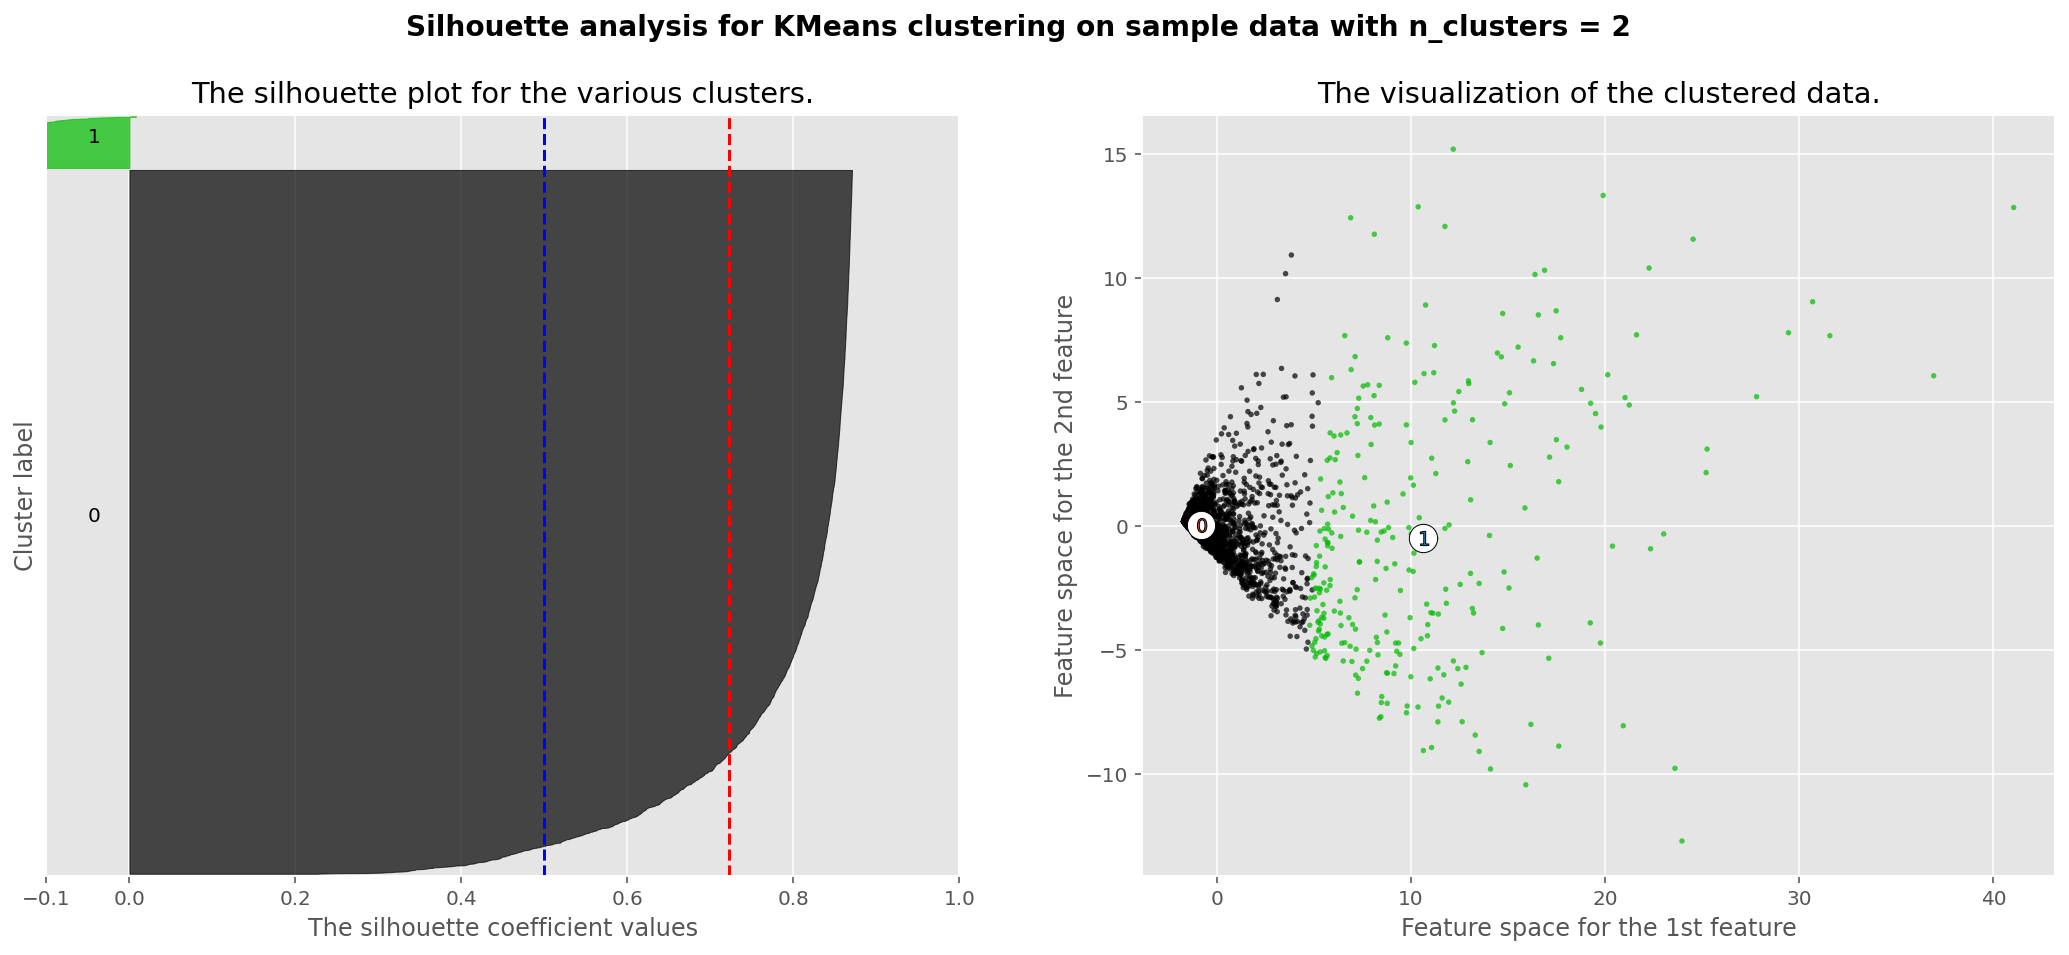

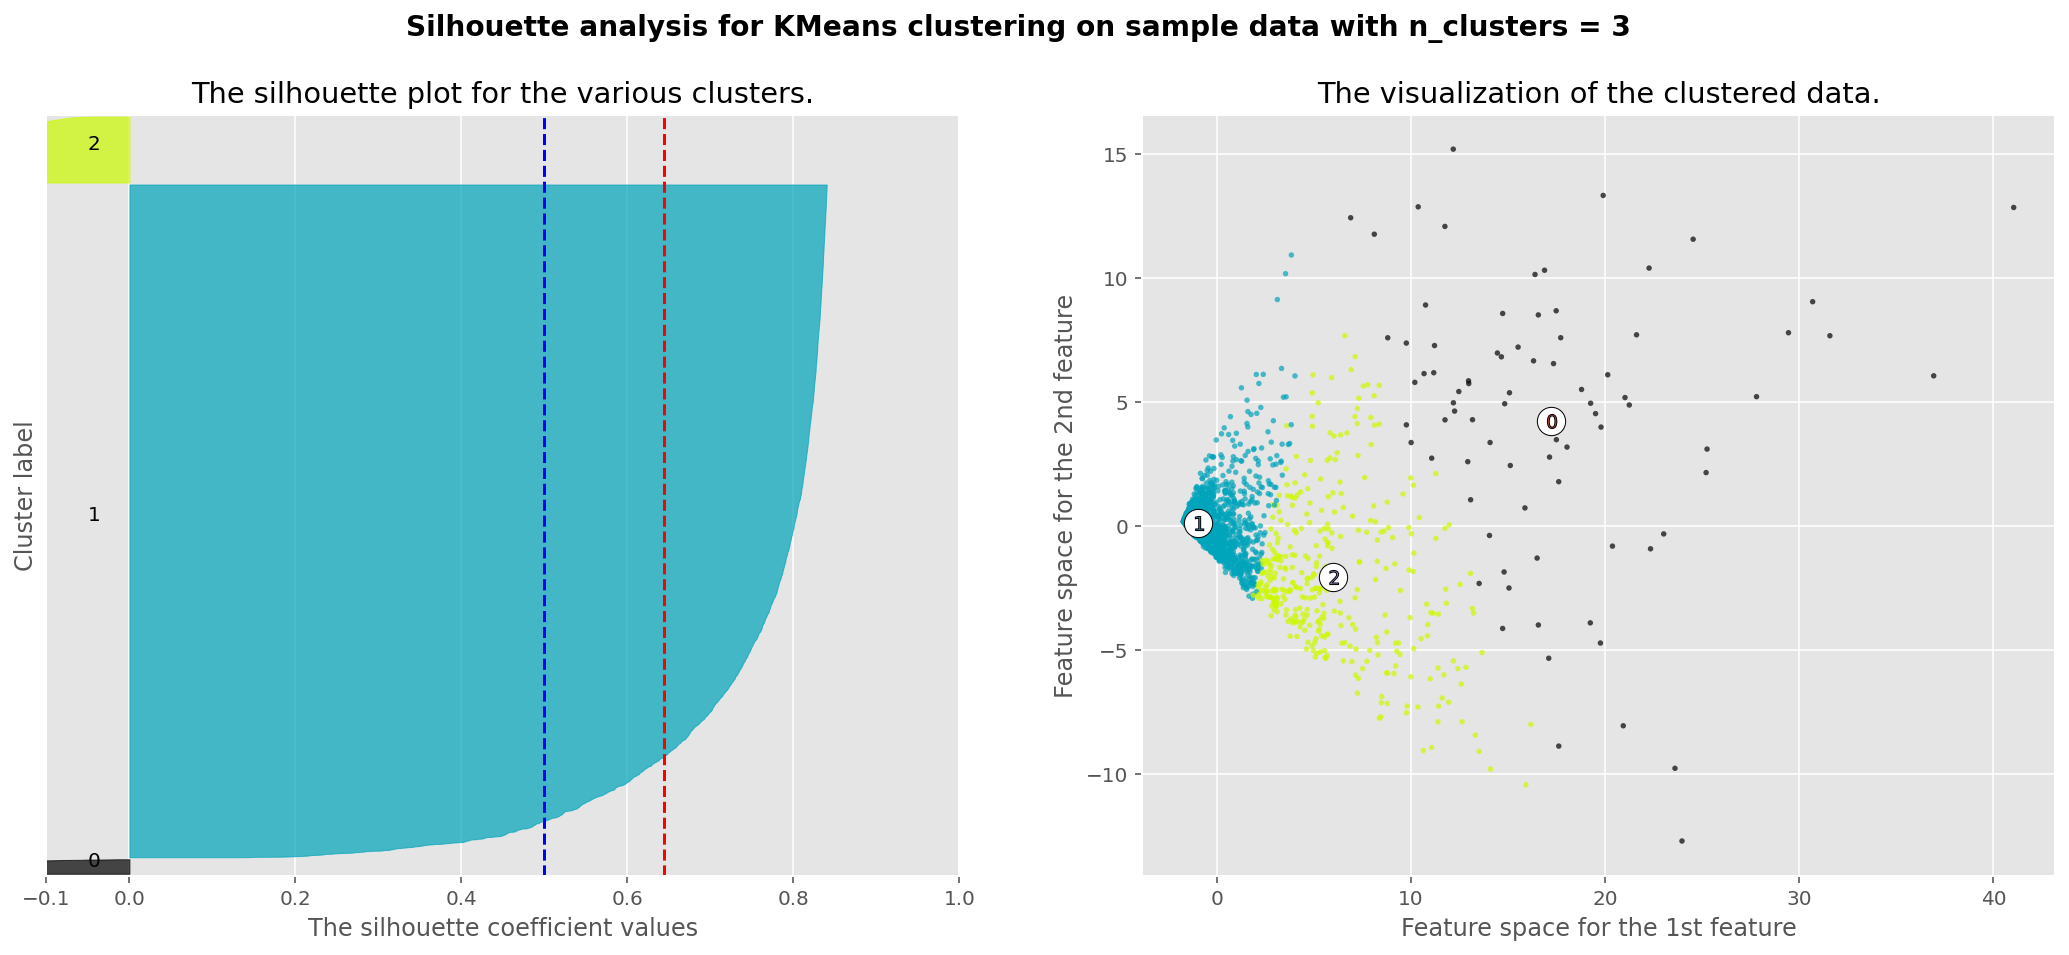

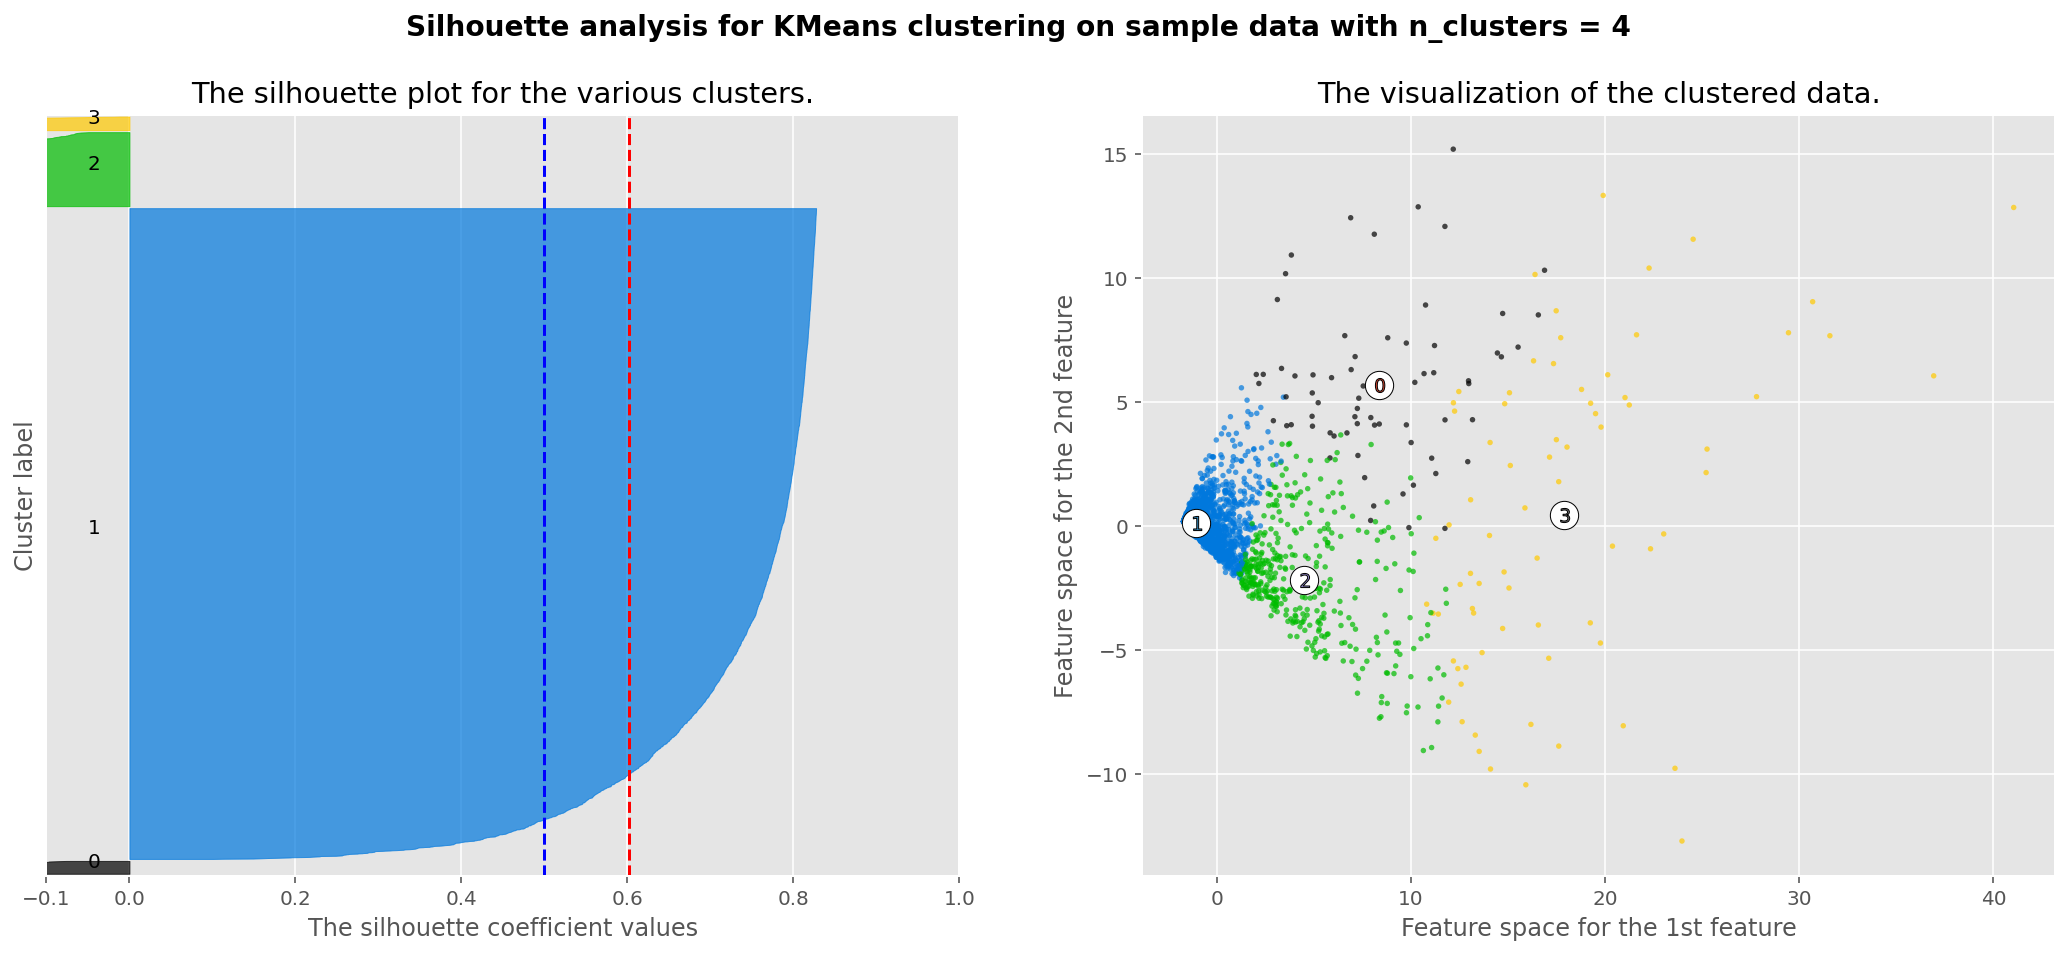

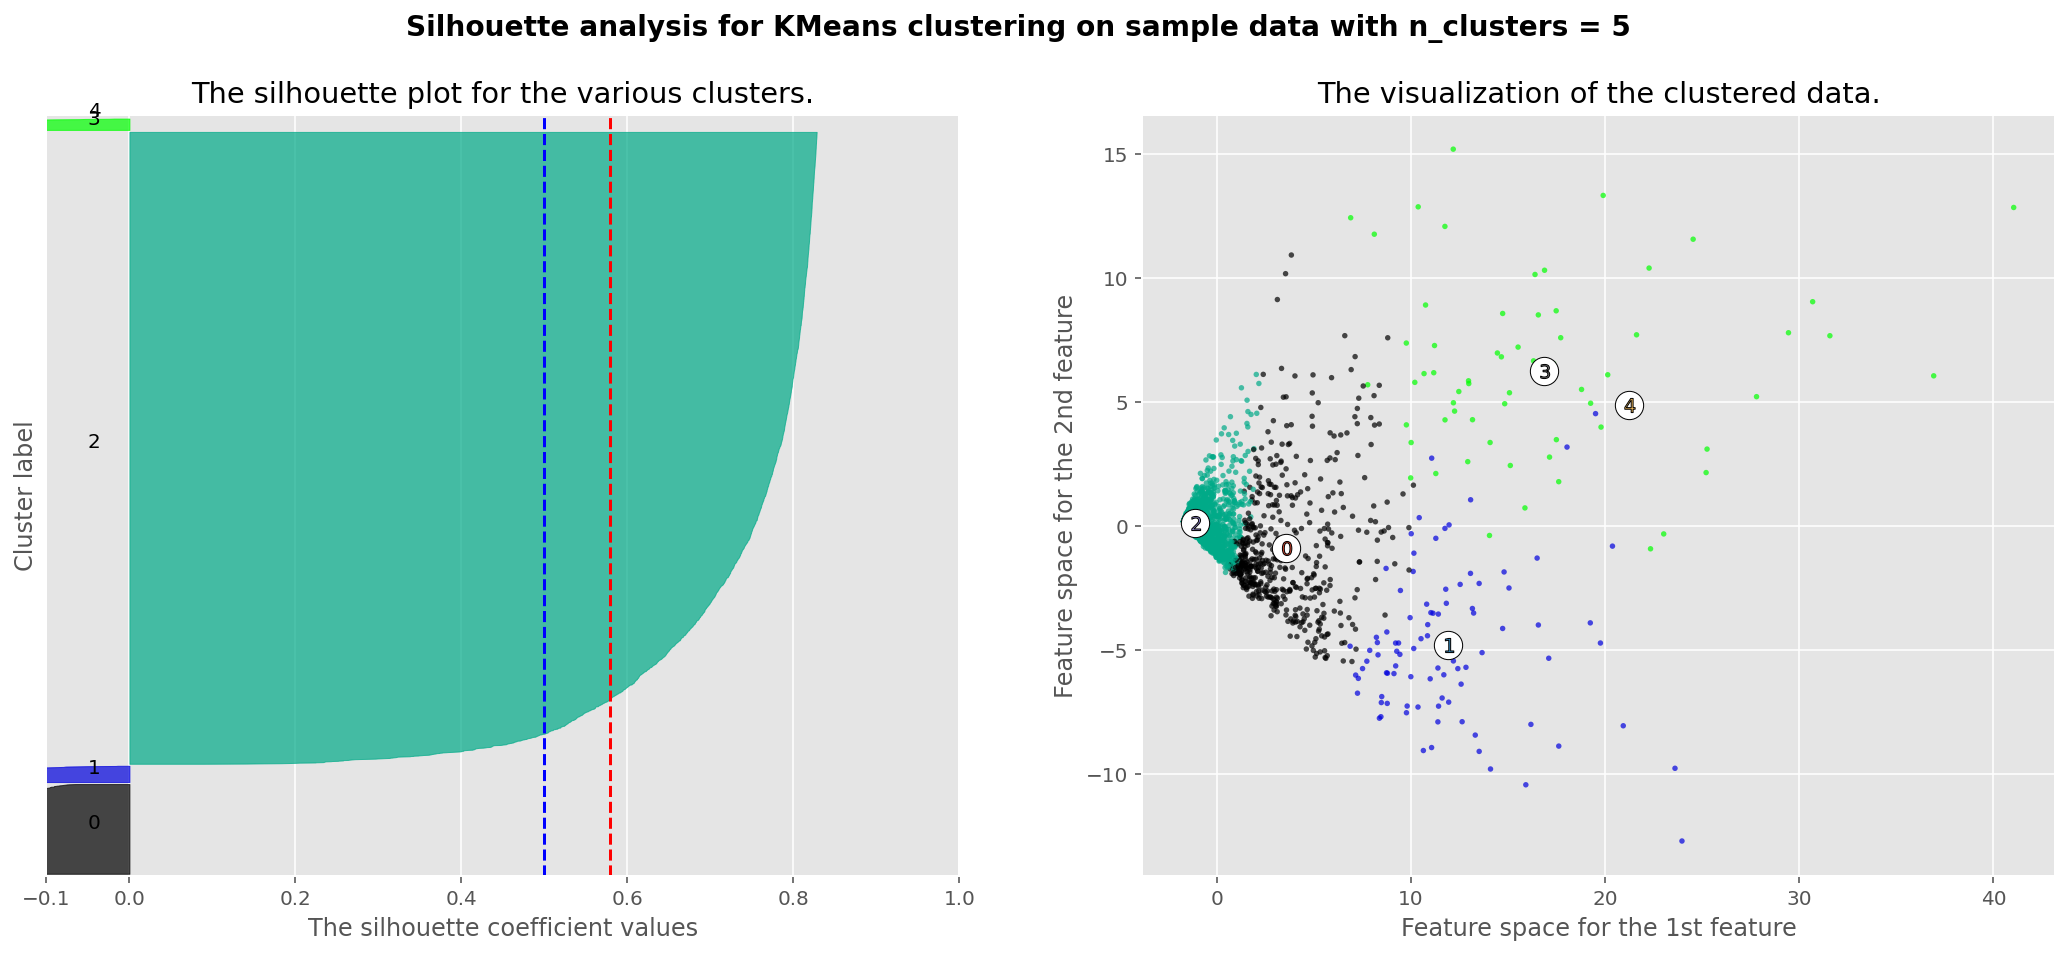

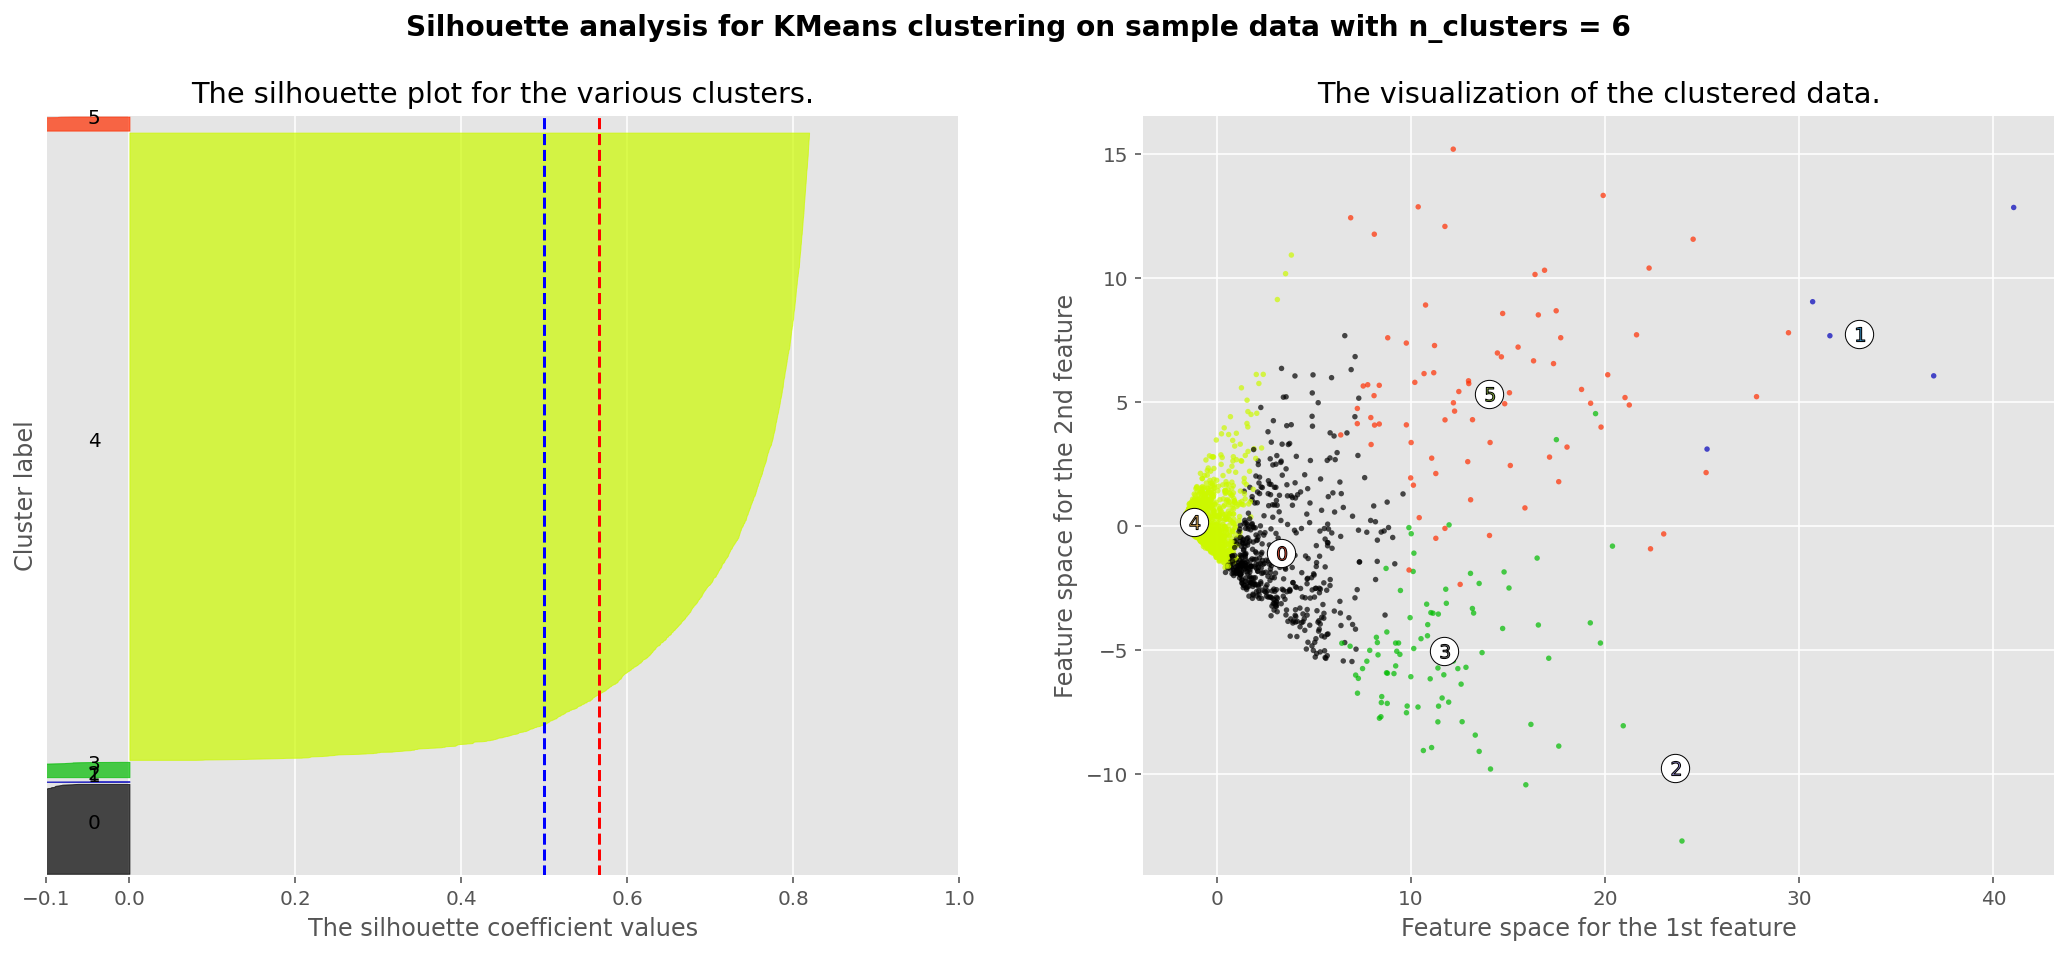

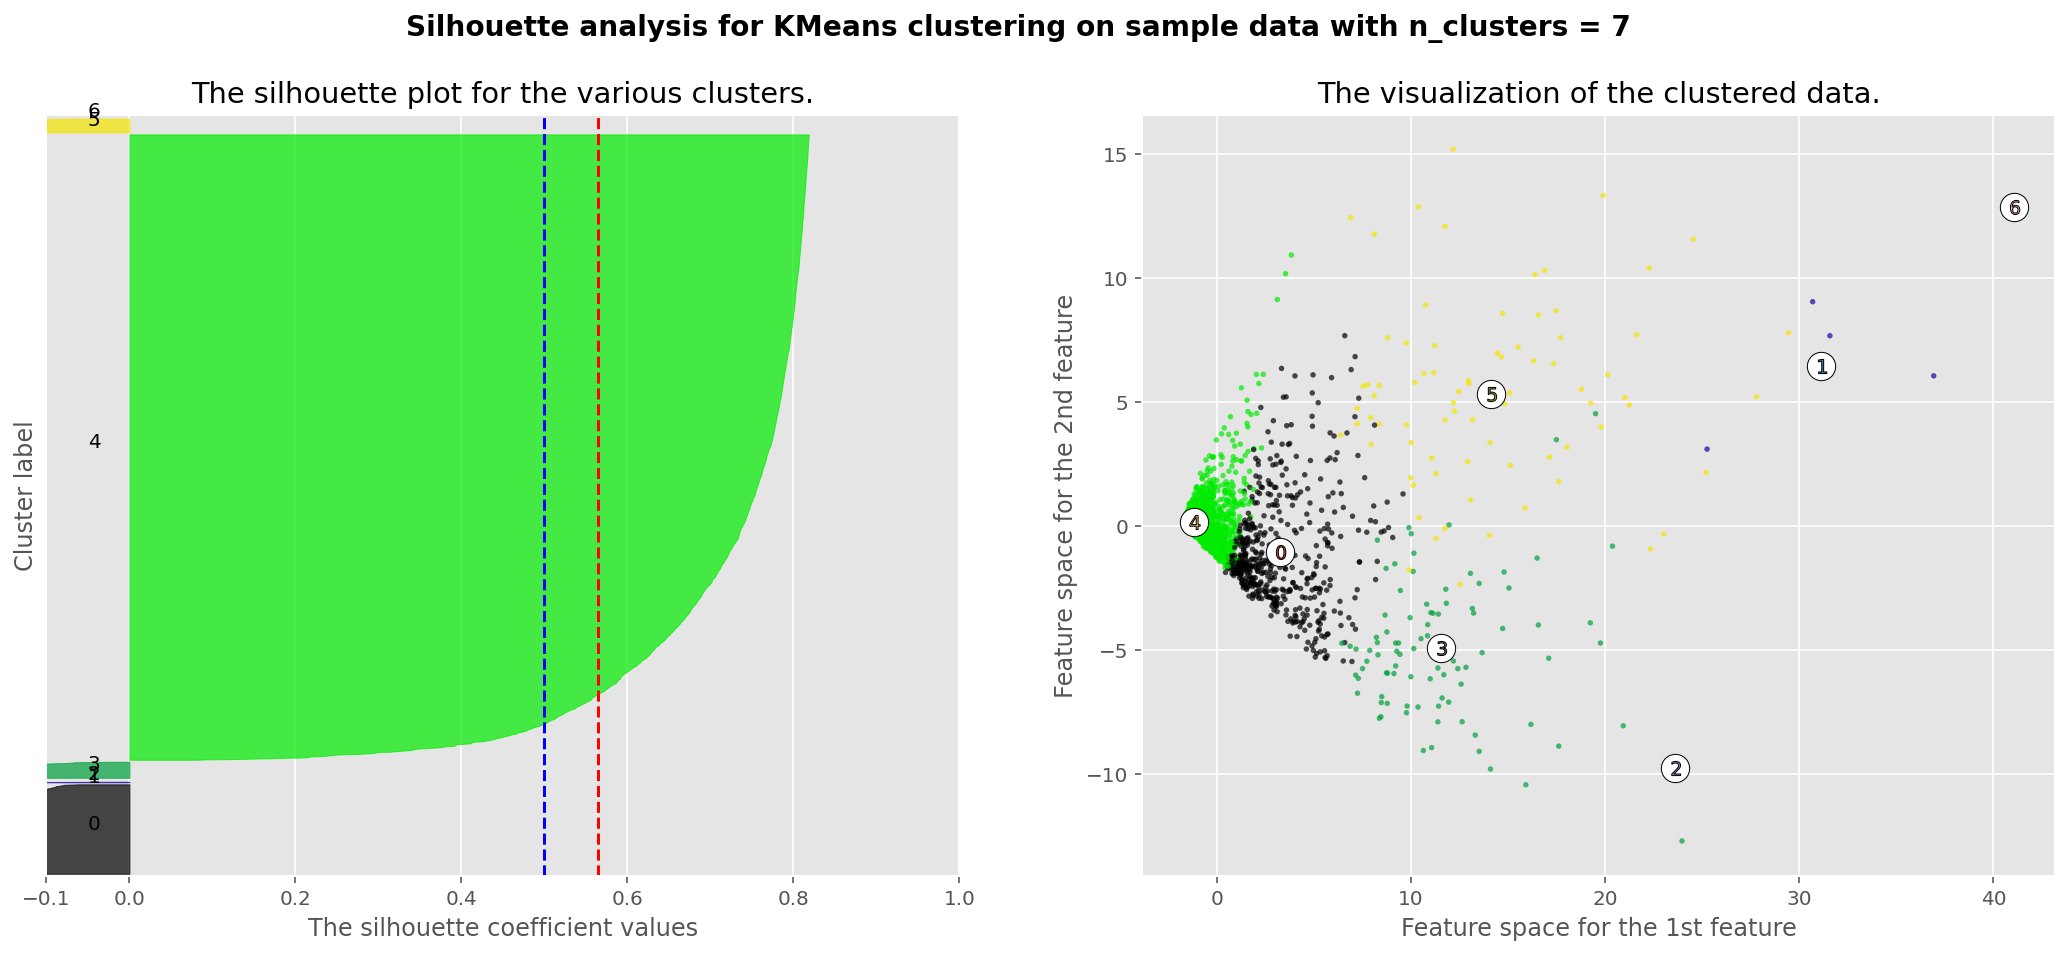

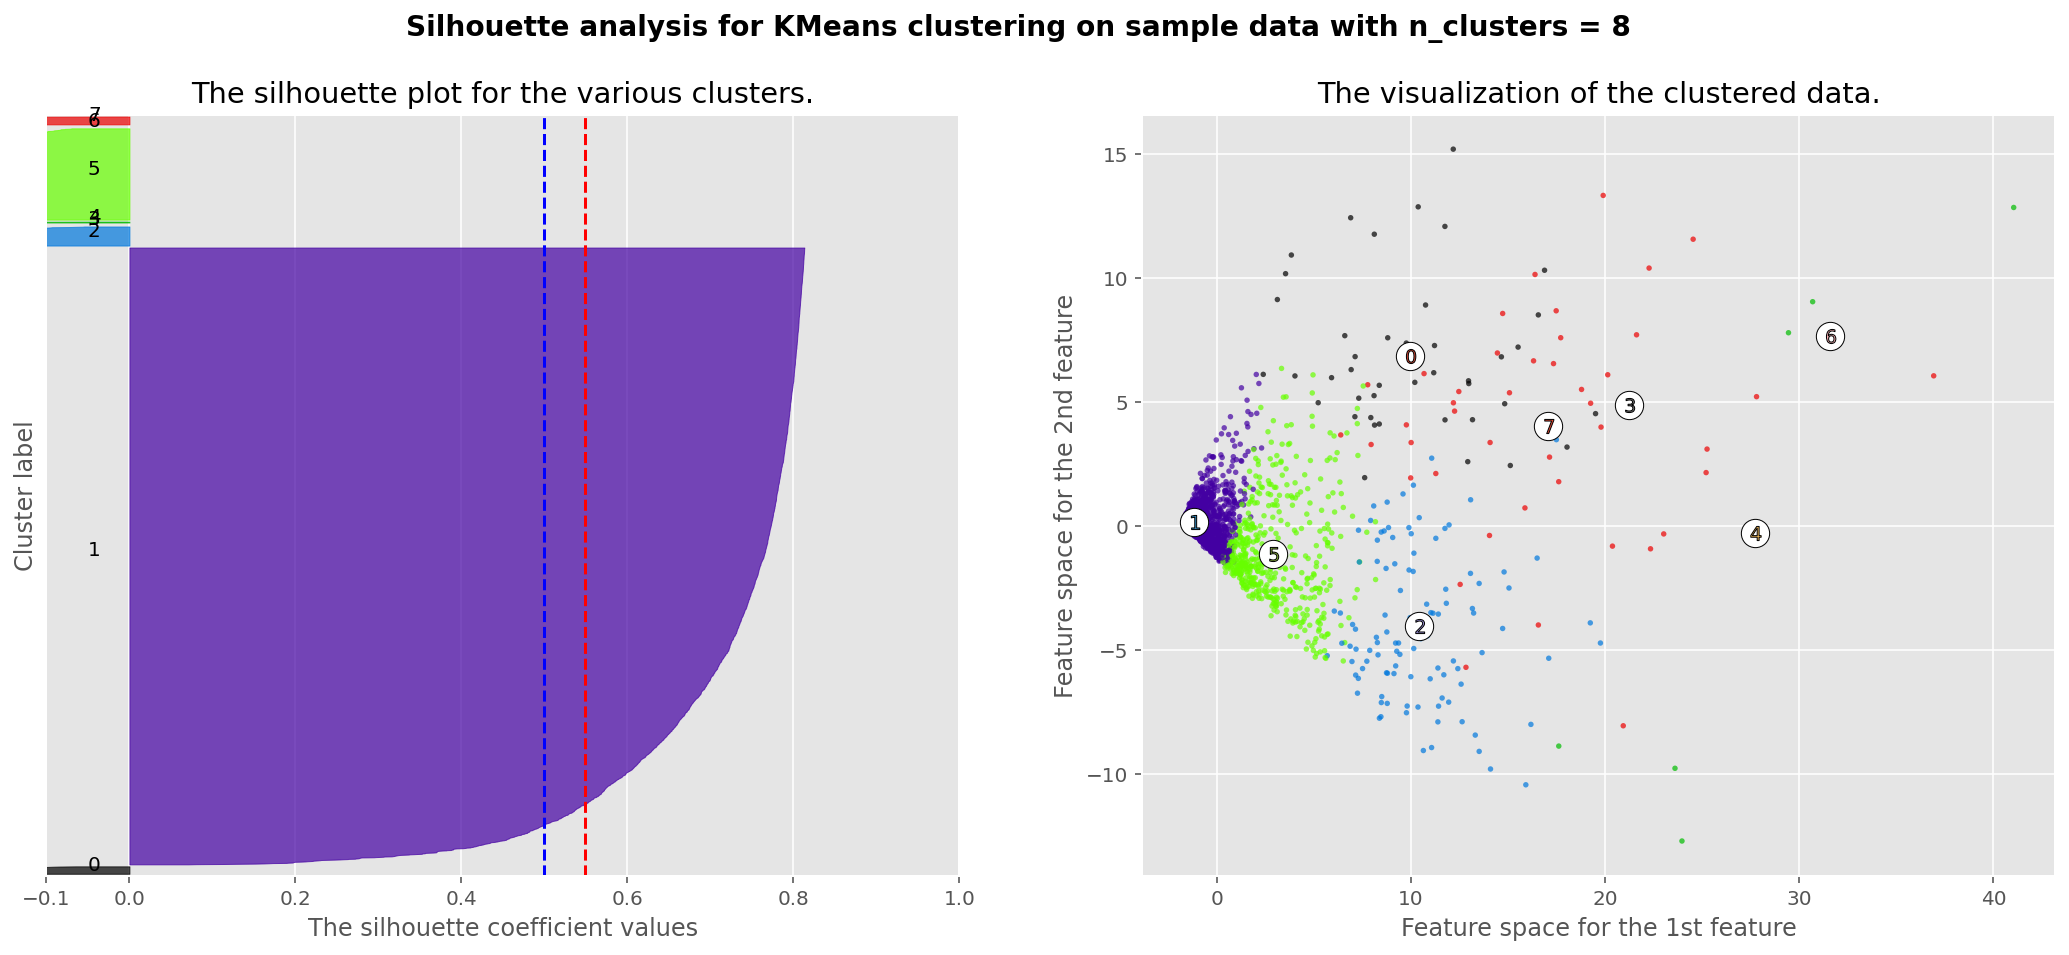

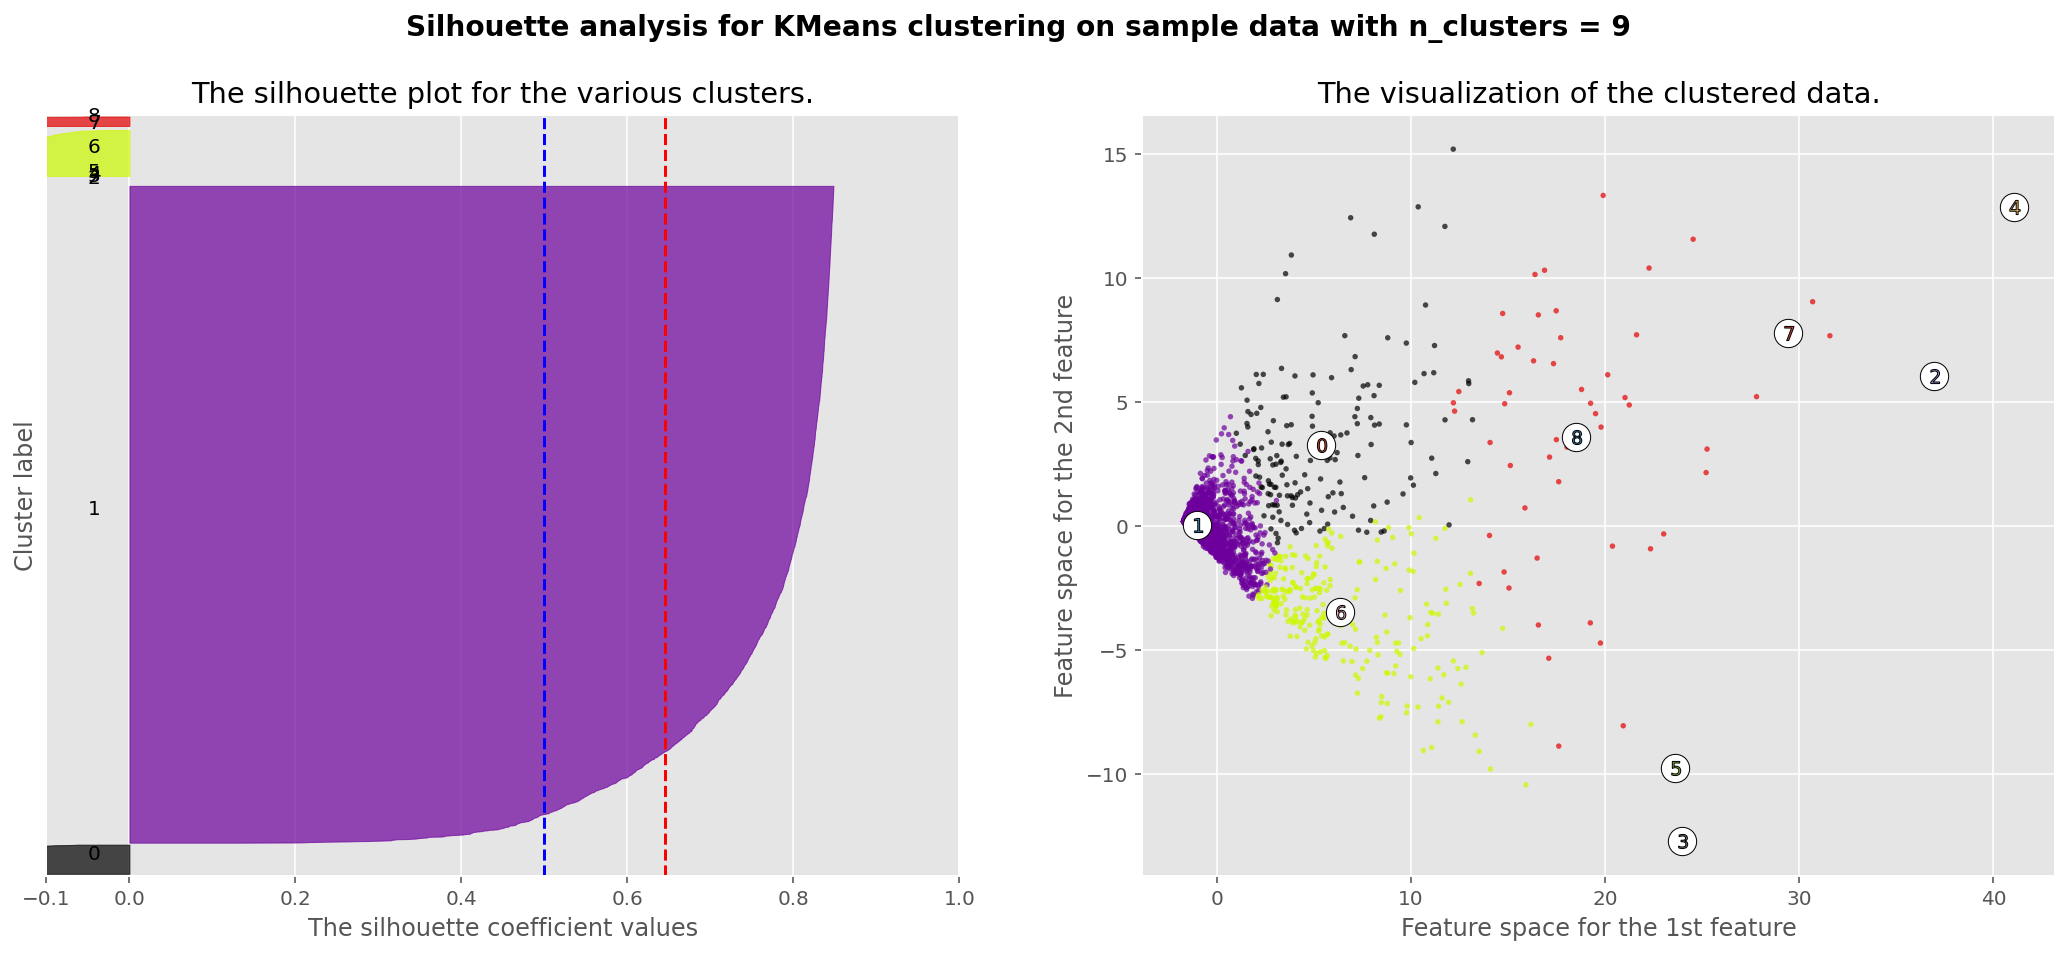

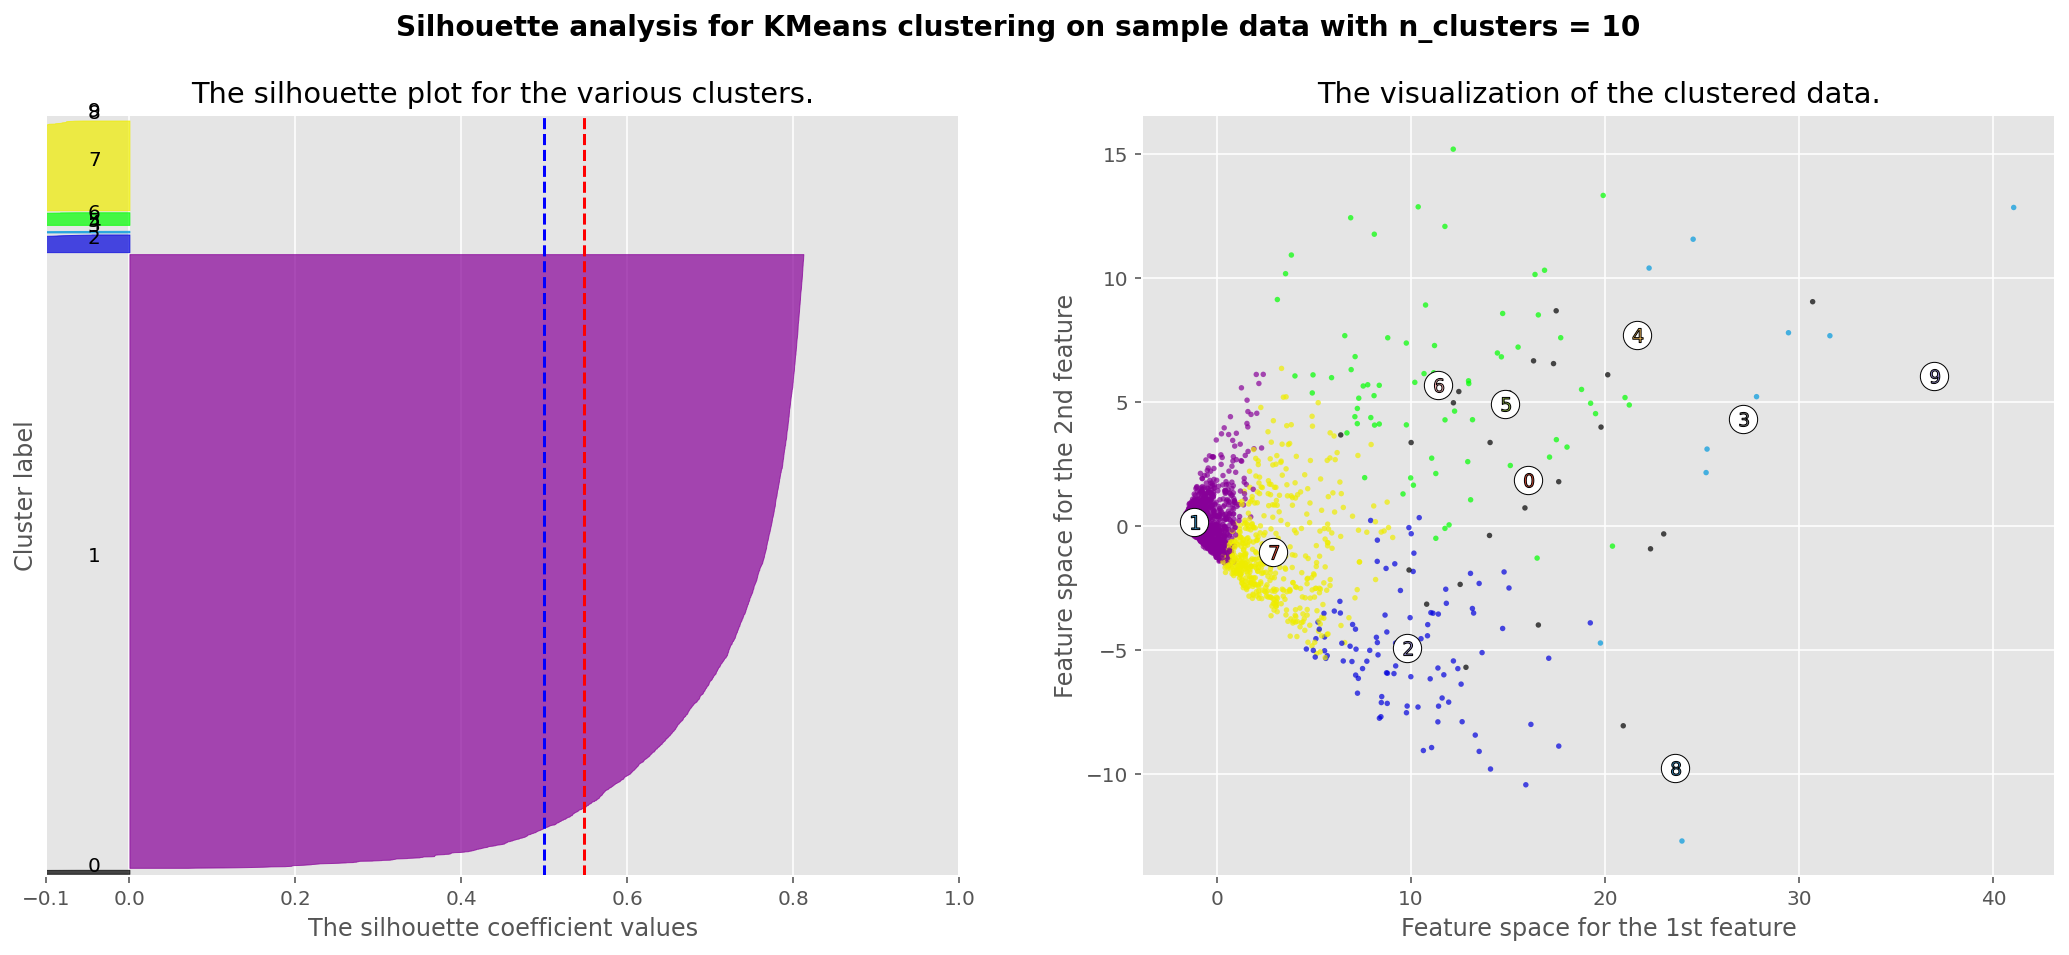

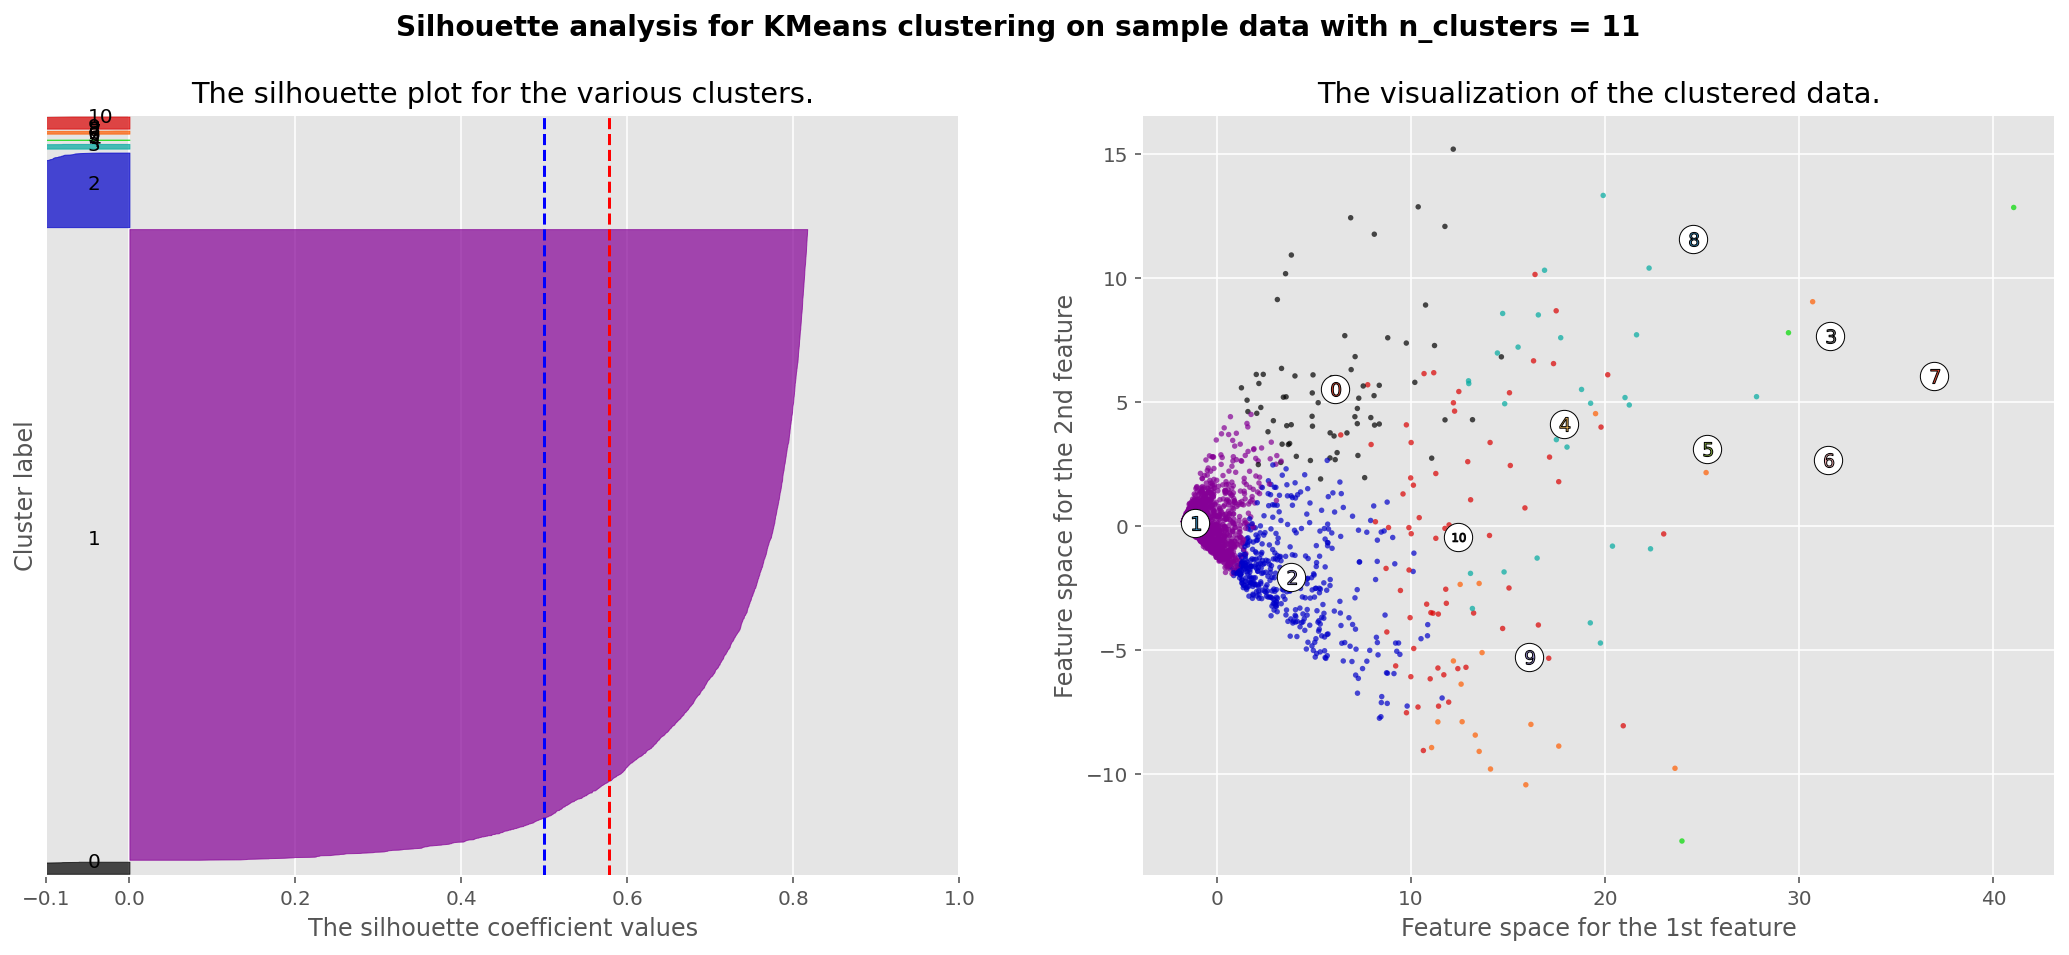

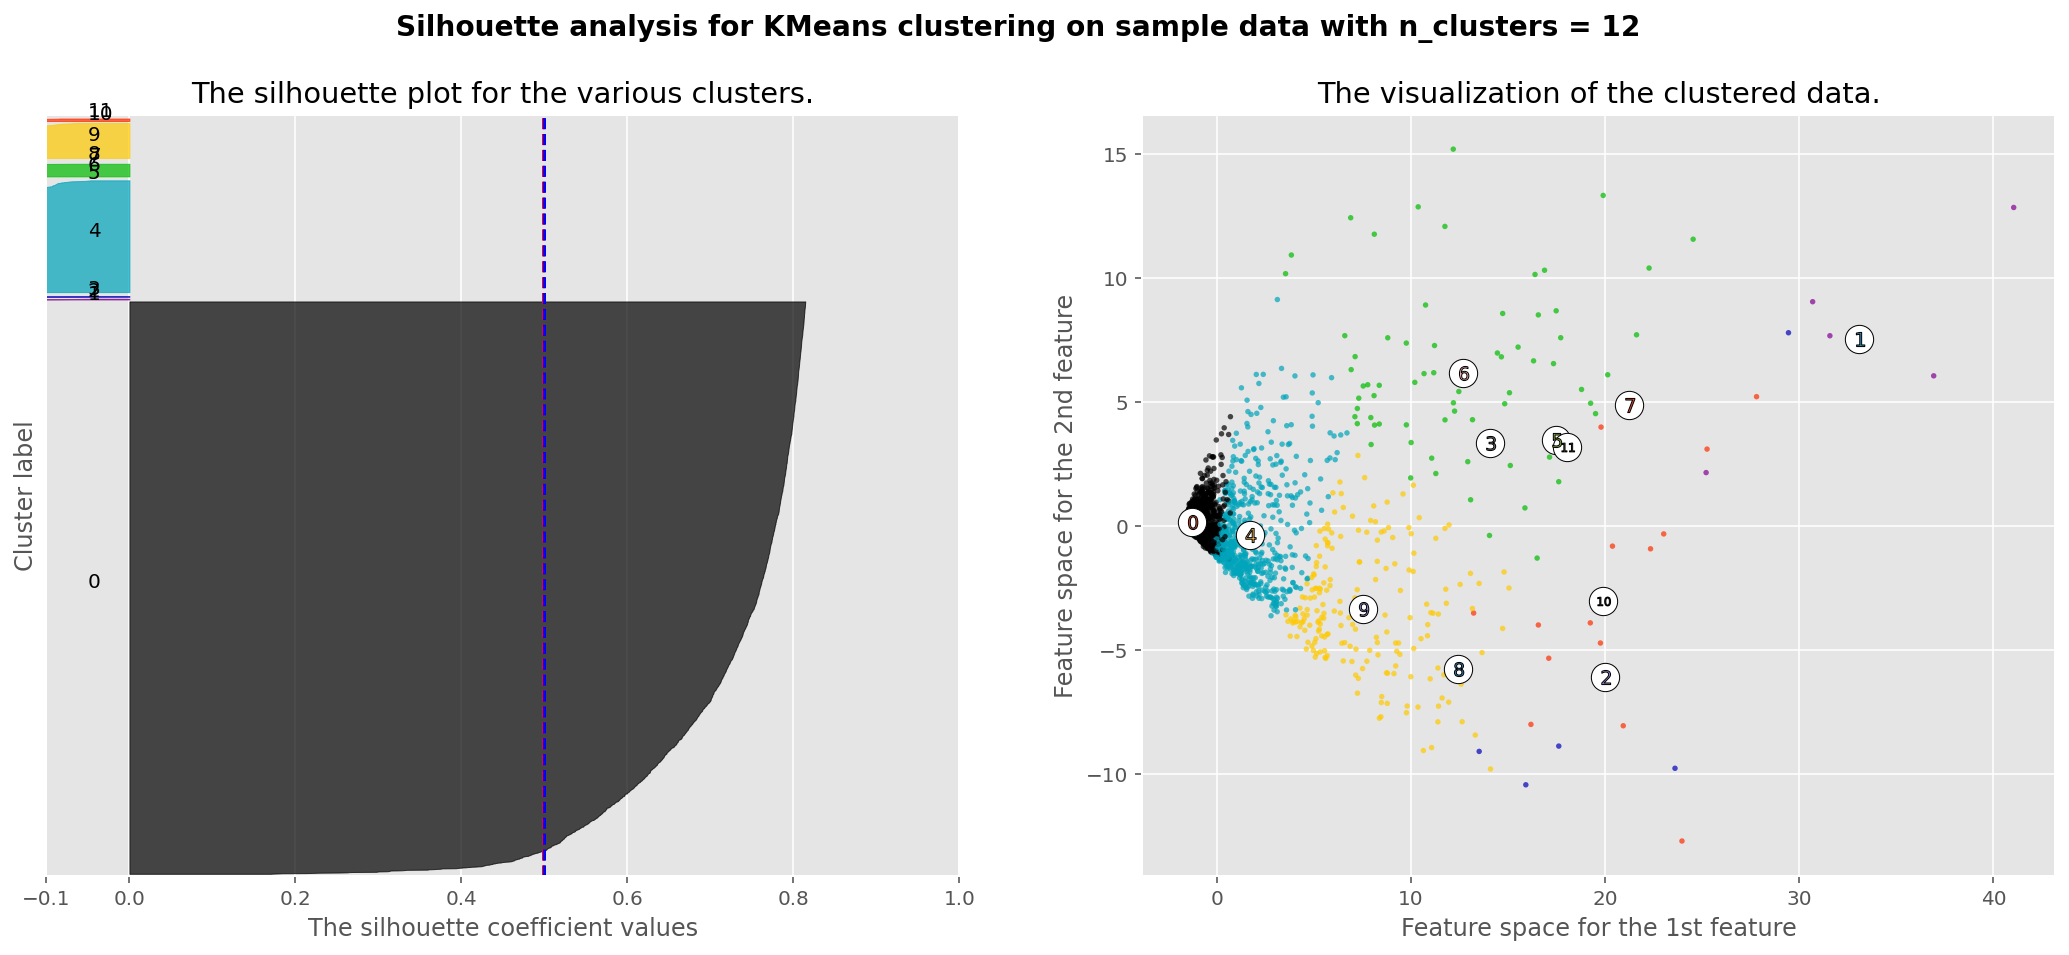

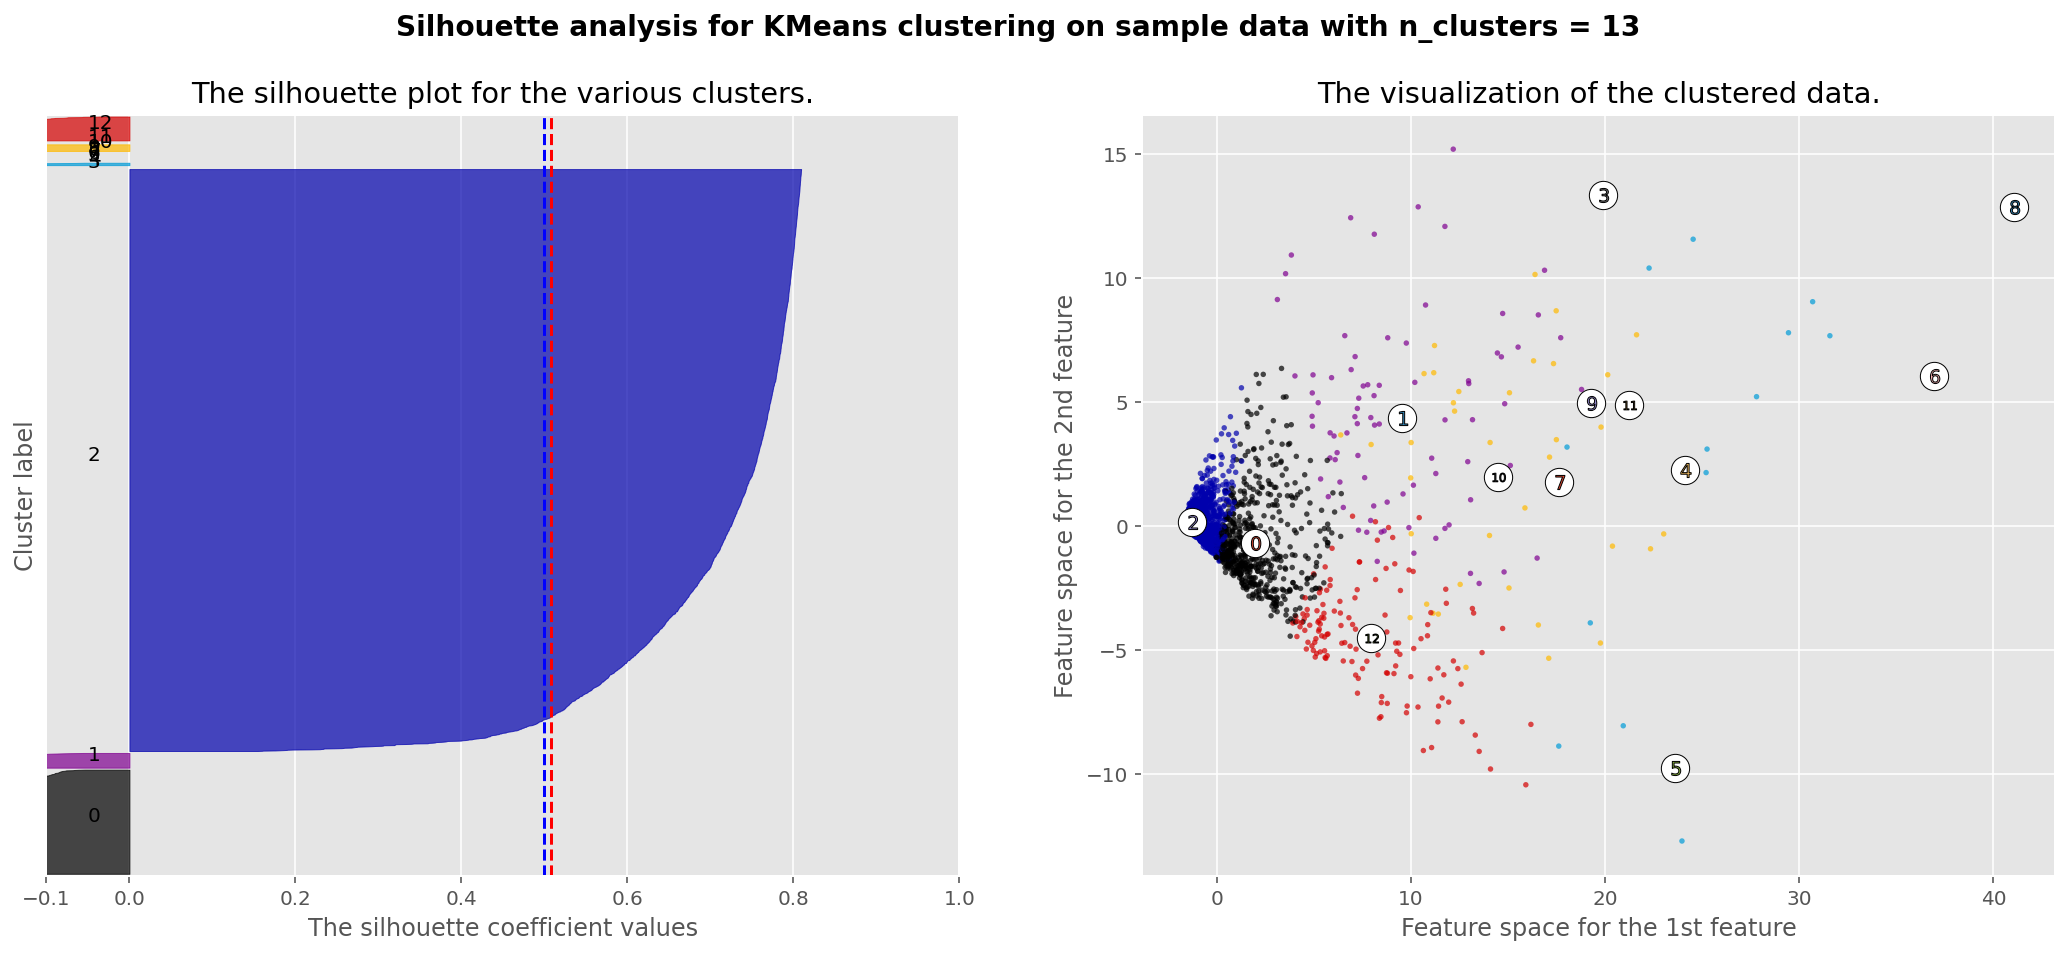

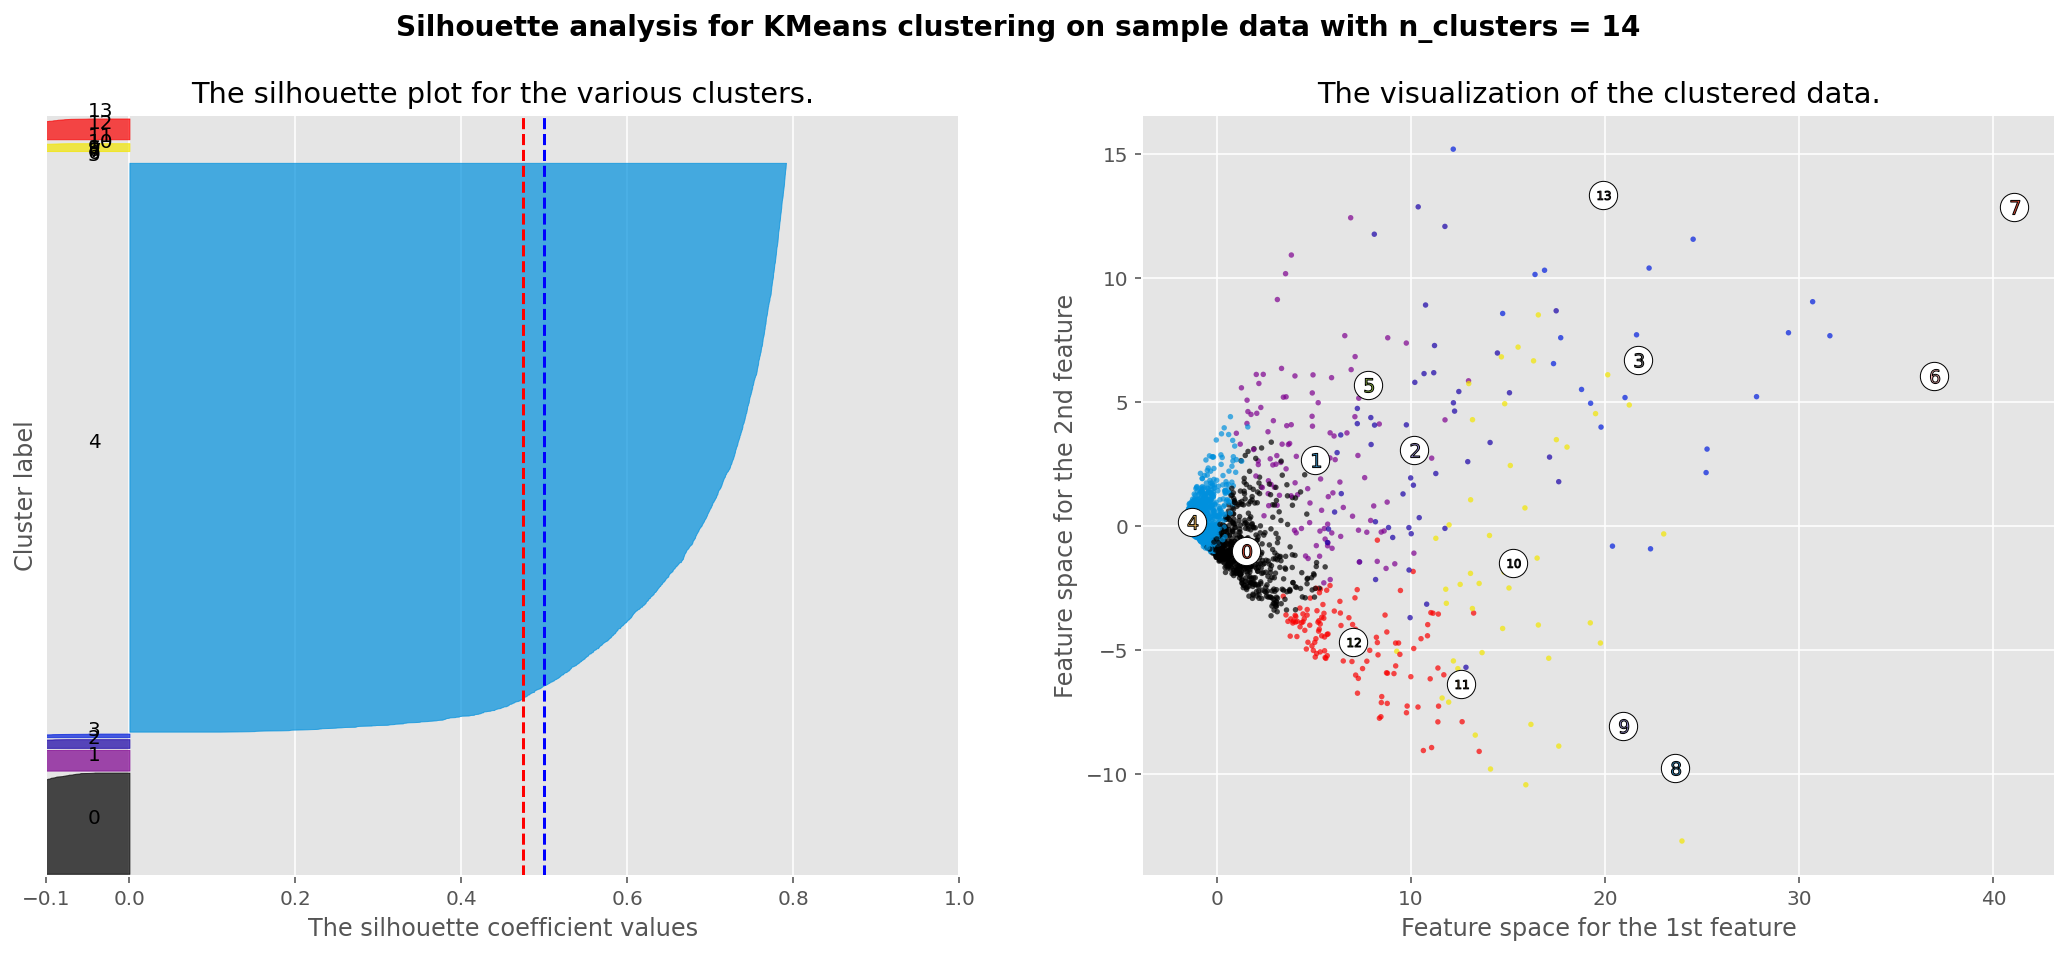

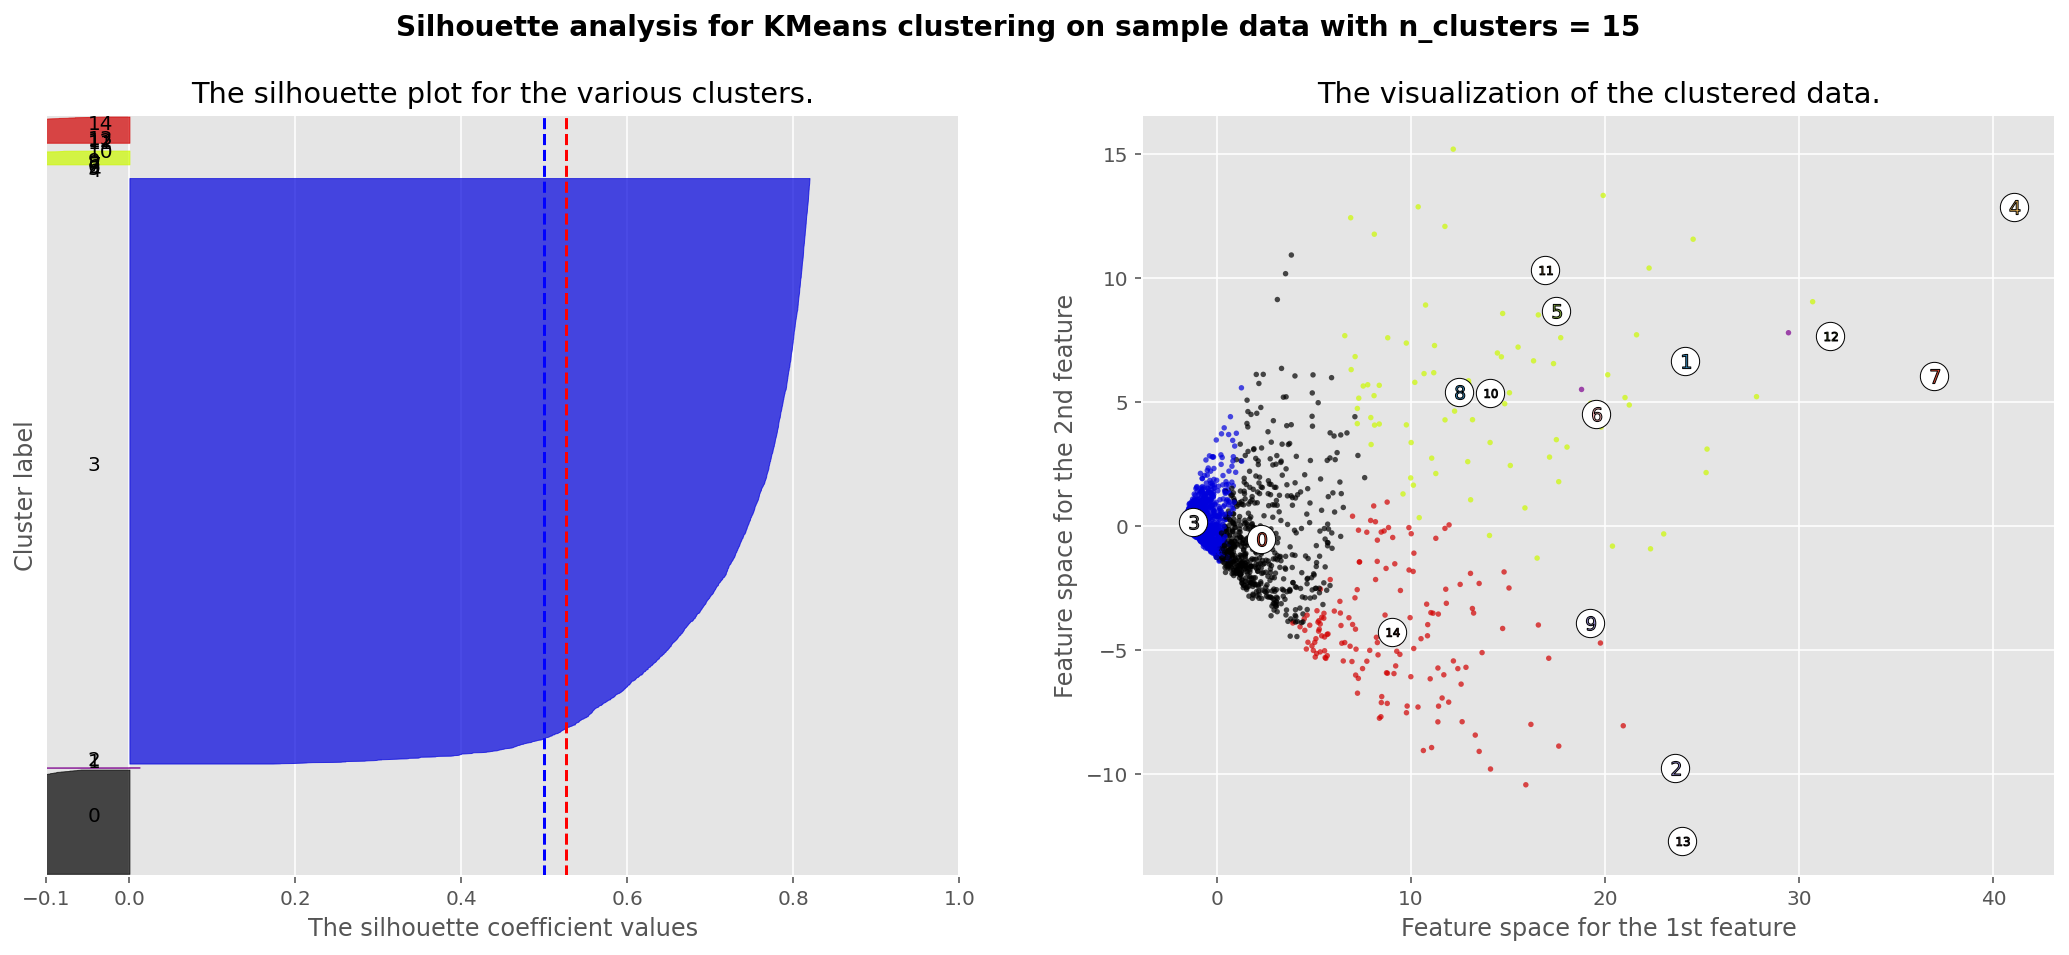

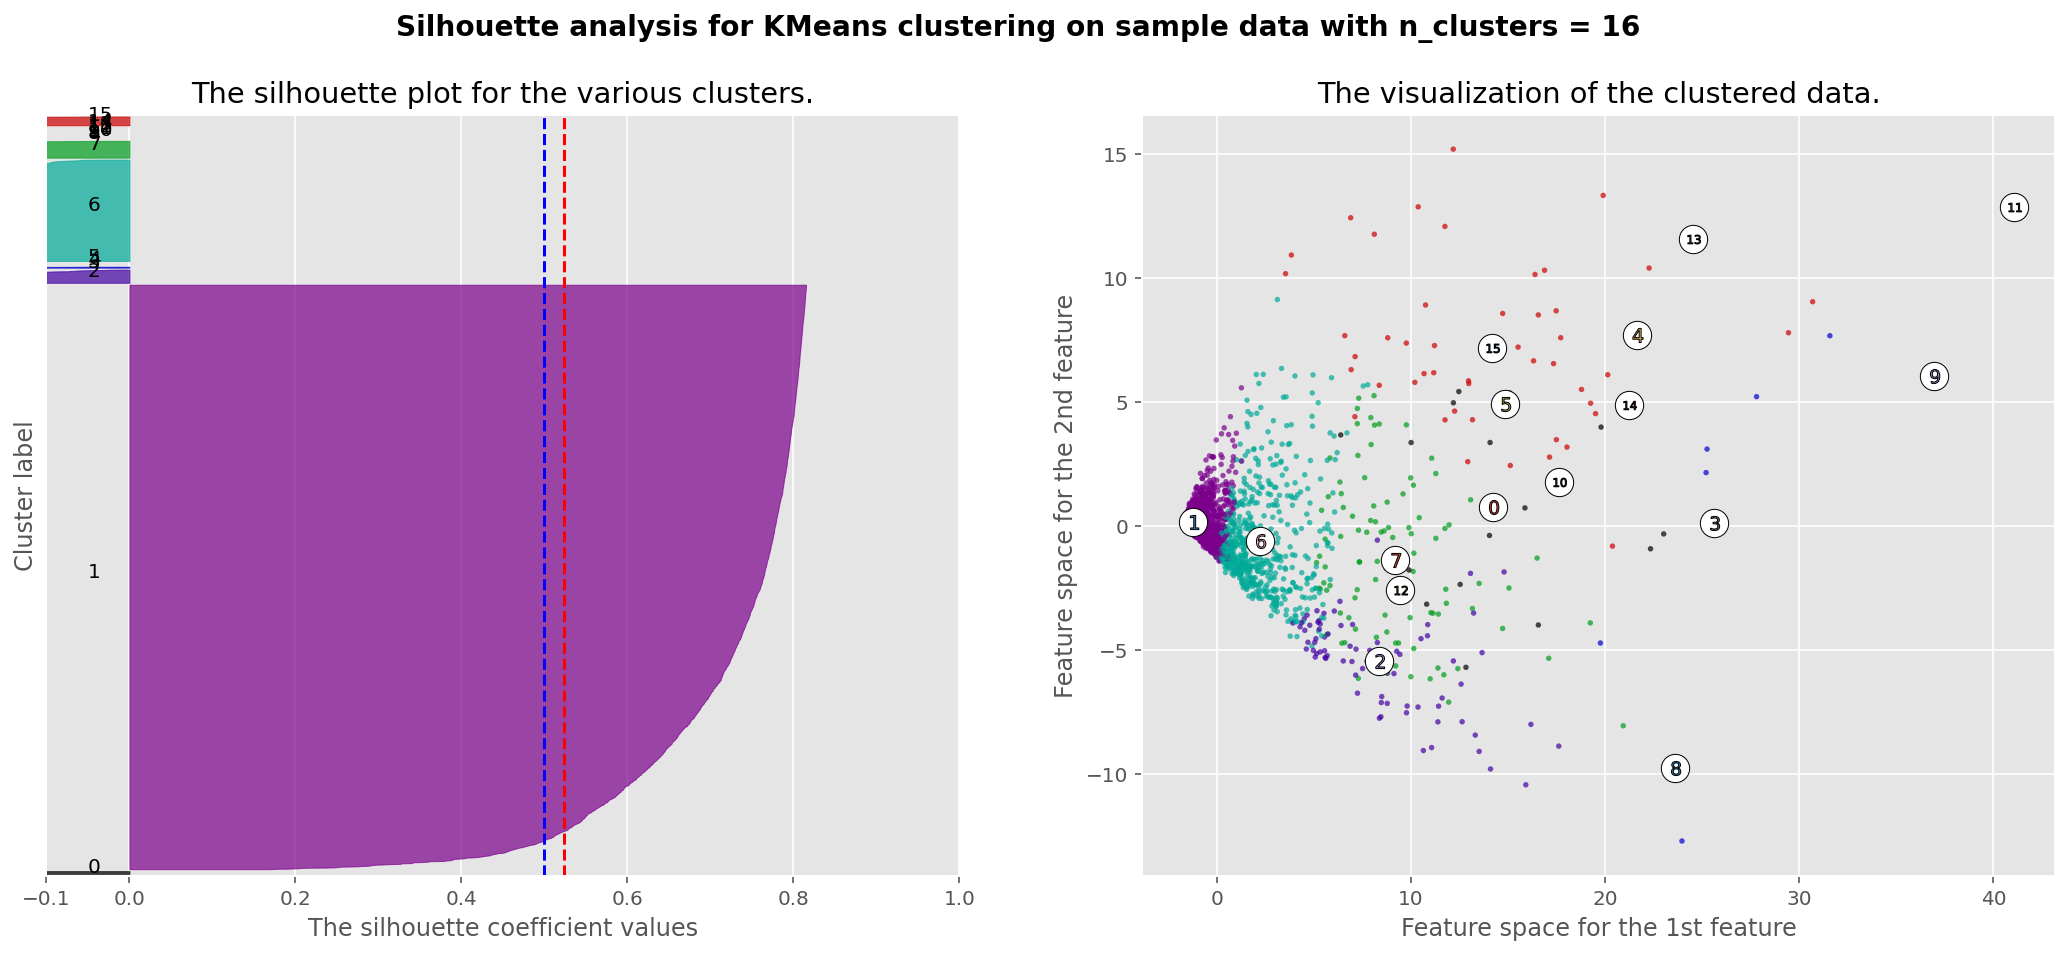

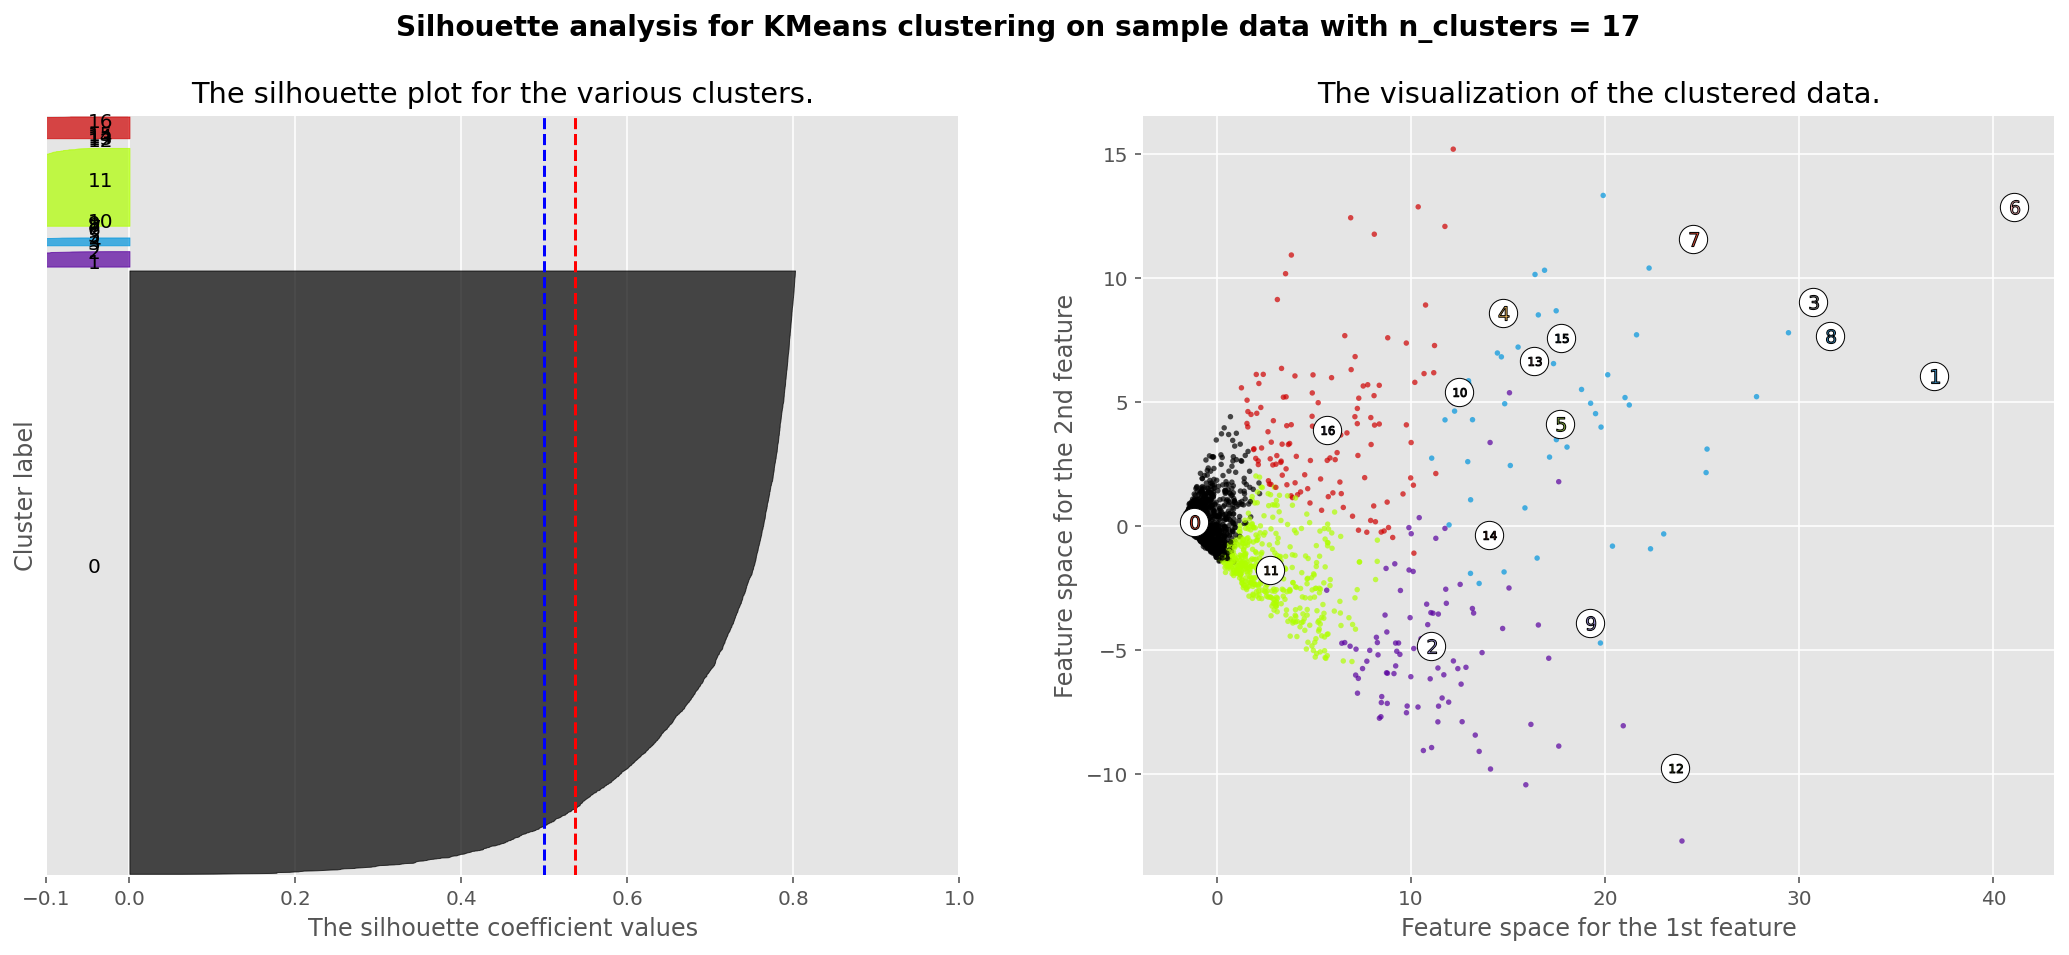

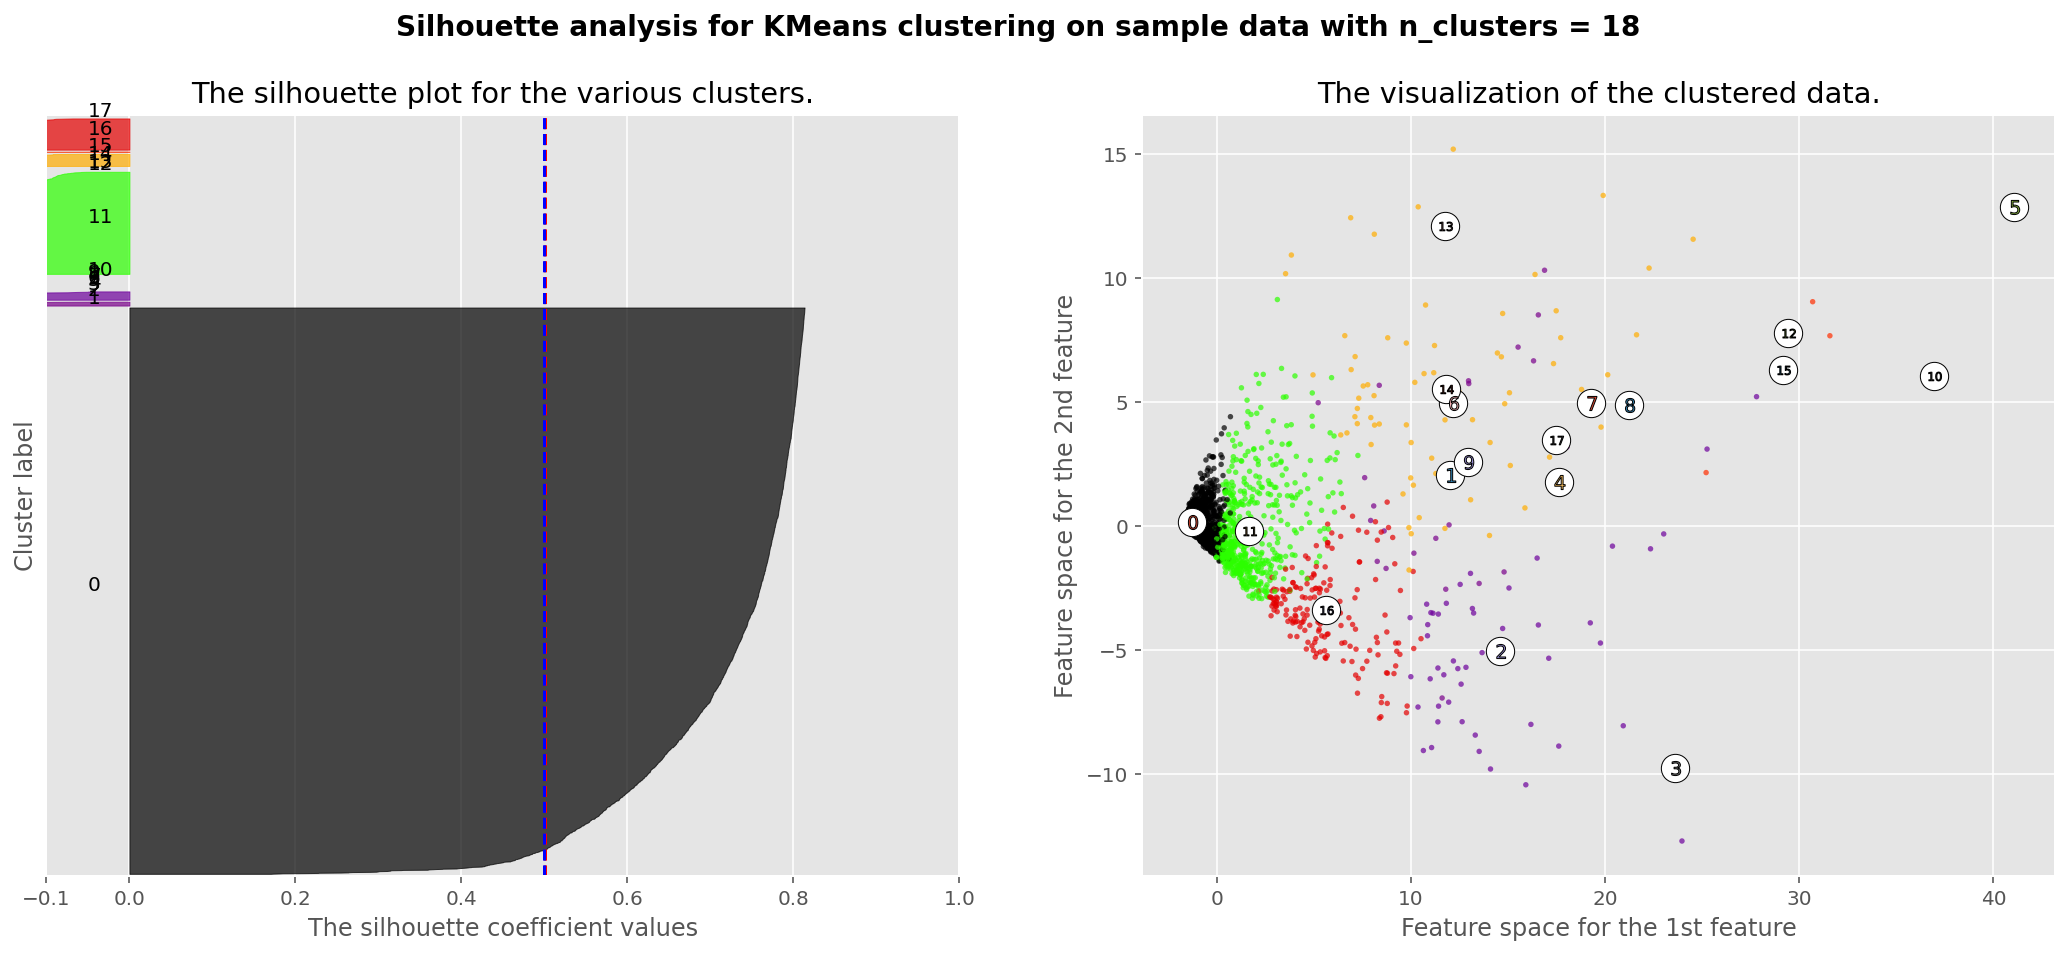

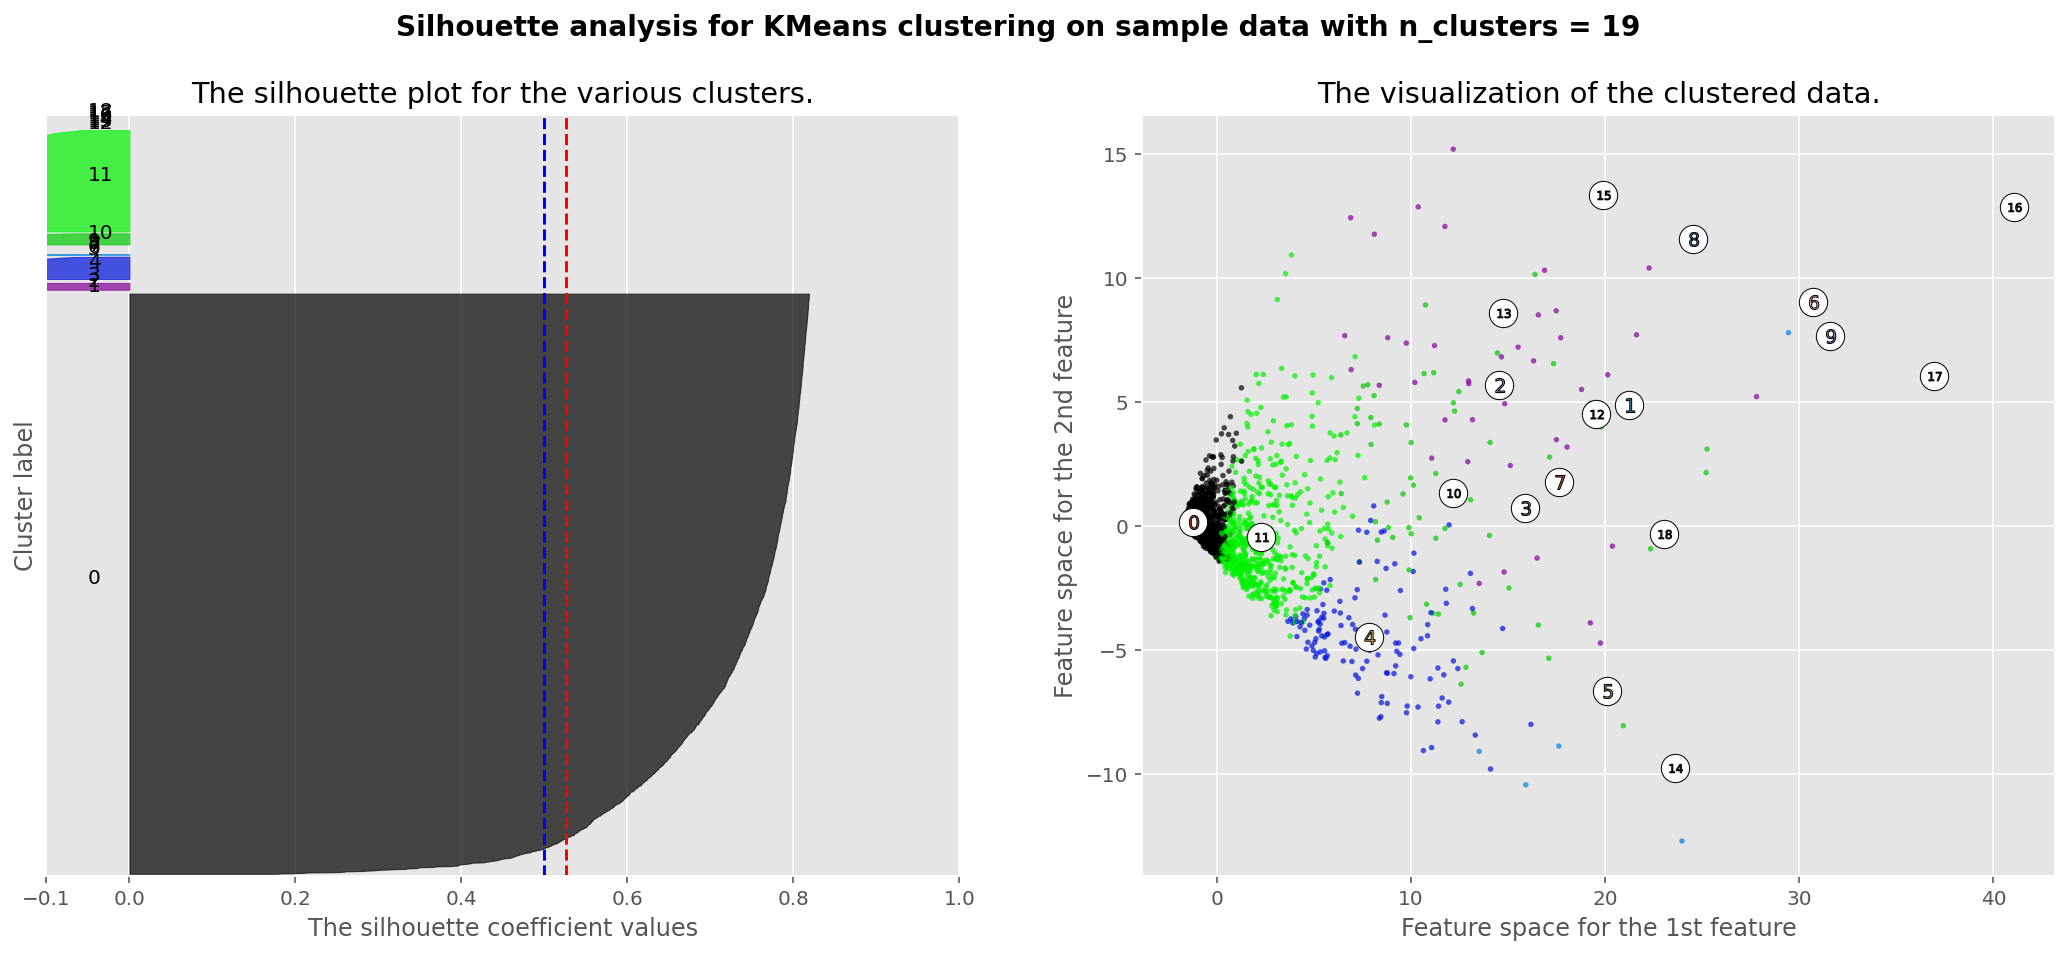

In [433]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tocluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(tocluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tocluster, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tocluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.axvline(x=0.5, color='blue', linestyle='--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tocluster[0], tocluster[1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [132]:
# plt.plot(range_n_clusters, scores);
# plt.title('Results KMeans')
# plt.xlabel('n_clusters');
# plt.axvline(x=4, color='blue', linestyle='--')
# plt.ylabel('Silhouette Score');
# plt.show()

# K means clustering

In [434]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[ 6.05073740e+00 -2.02657291e+00 -5.63457617e-01 ...  1.98716197e-02
   4.75658717e-03  2.40910419e-03]
 [ 1.73903663e+01  4.42290134e+00  1.16337570e+00 ... -1.31137893e-02
  -2.10880028e-02  1.37584916e-02]
 [-9.62745538e-01  1.07216582e-01  3.12034175e-02 ... -1.68678793e-03
  -2.67616862e-05 -5.26868405e-04]]


/var/folders/g6/qtvrbqf960v1l069d_0yh2lc0000gn/T/ipykernel_74342/650782473.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


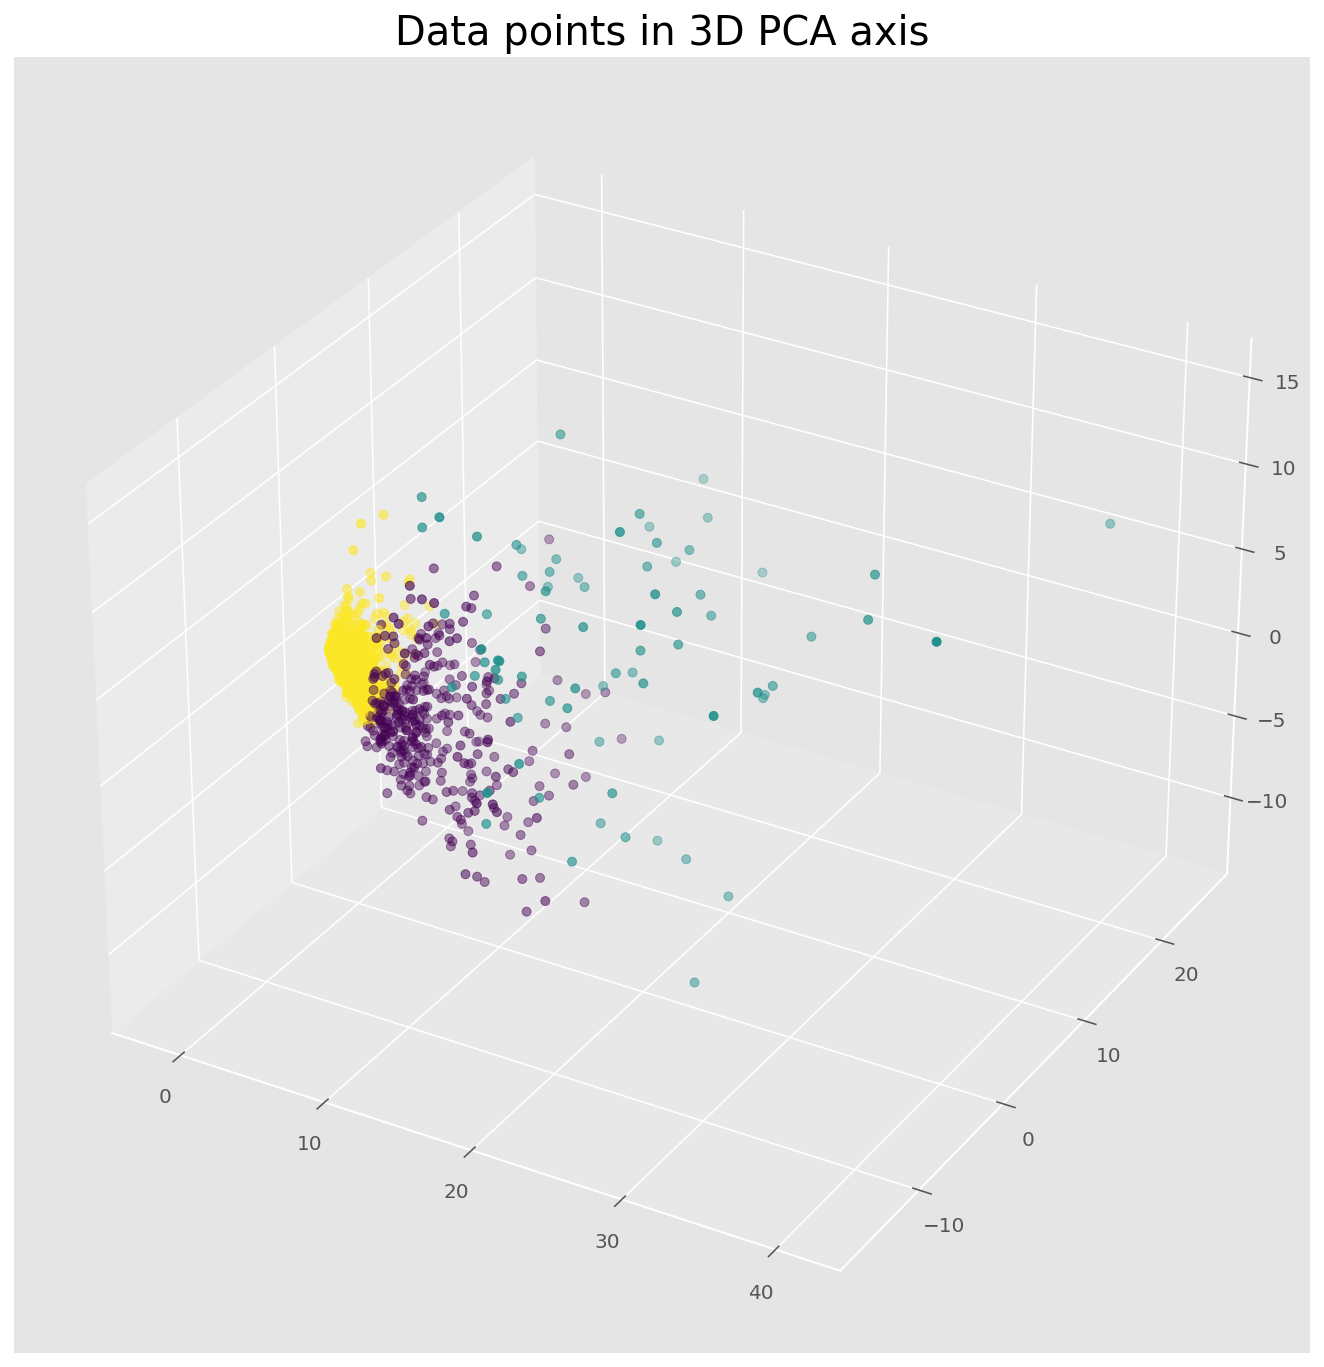

In [435]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()


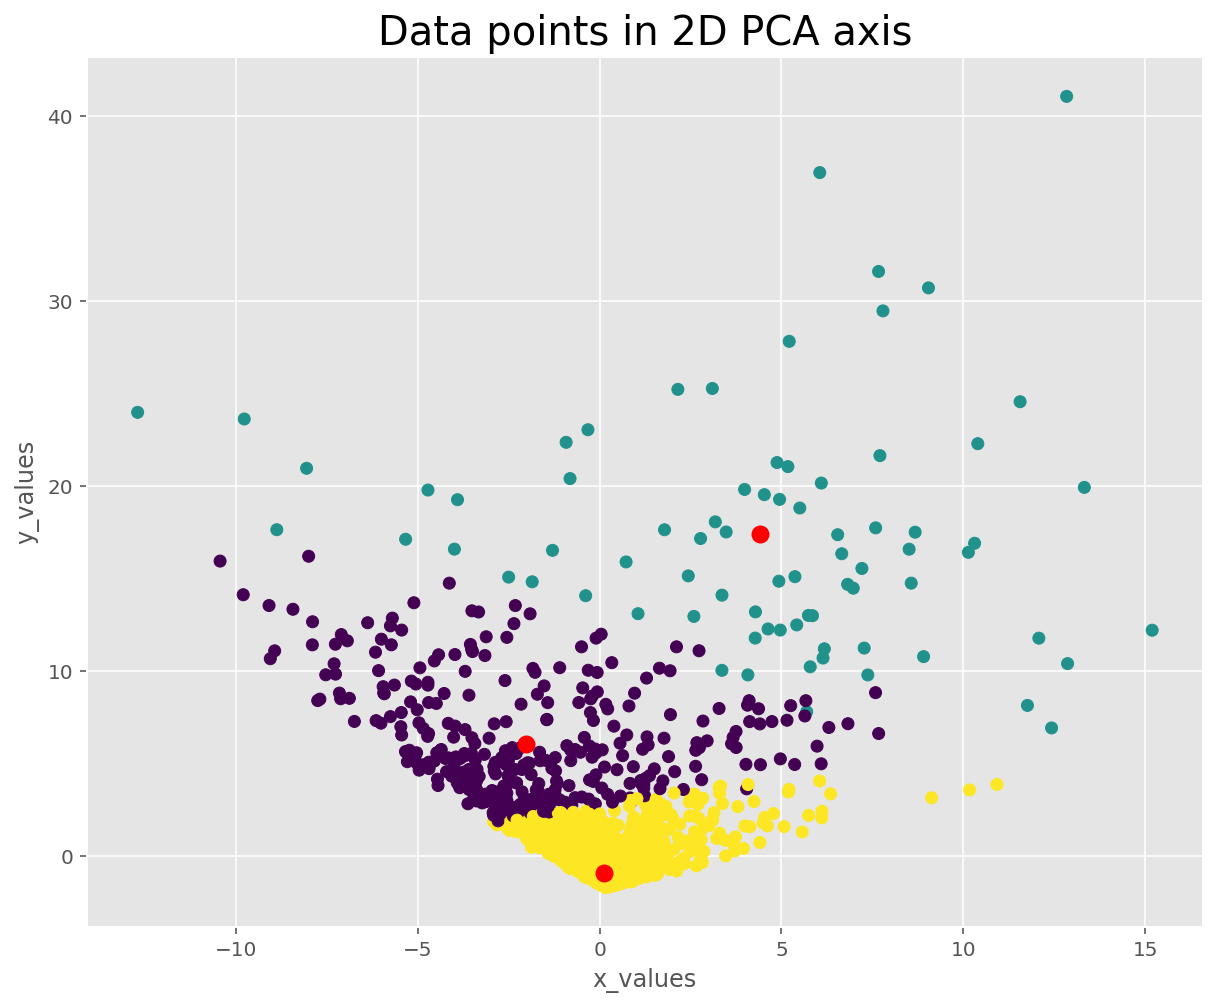

In [436]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [437]:
user_movie['cluster'] = c_preds
user_movie.head(10)

movie_title  #生きている  (r)adiusラディウス  -less［レス］  -×-（マイナス・カケル・マイナス）  0.5ミリ  \
user_id                                                                    
20001             0              0          0                   0      0   
20031             0              0          0                   0      0   
20033             0              0          0                   0      0   
20035             0              0          0                   0      0   
20036             0              0          0                   0      0   
20037             0              0          0                   0      0   
20039             0              0          0                   0      0   
20040             0              0          0                   0      0   
20041             0              0          0                   0      0   
20042             0              0          0                   0      0   

movie_title  008　皇帝ミッション  009RE:CYBORG  1.0【ワン・ポイント・オー】  100,000年後の安全  \
user_id                                                                 
20001                  0             0                0             0   
20031                  0             0                0             0   
20033                  0             0                0             0   
20035                  0             0                0             0   
20036                  0             0                0             0   
20037                  0             0                0             0   
20039                  0             0                0             0   
20040                  0             0                0             0   
20041                  0             0                0             0   
20042                  0             0                0             0   

movie_title  1000年女王  ...  ＺＯＯ(2004)  ＺＶＳ　ゾンビVSスナイパー  ［リミット］  ｅｋｉｄｅｎ[駅伝]  \
user_id               ...                                                  
20001              0  ...          0               0       0           0   
20031              0  ...          0               0       0           0   
20033              0  ...          0               0       0           0   
20035              0  ...          0               0       0           0   
20036              0  ...          0               0       0           0   
20037              0  ...          0               0       0           0   
20039              0  ...          0               0       0           0   
20040              0  ...          0               0       0           0   
20041              0  ...          0               0       0           0   
20042              0  ...          0               0       0           0   

movie_title  ｇ＠ｍｅ．(2003)  ｉｆ　もしも・・・・  ｍａｎ－ｈｏｌｅ  ｍｙベスト・フレンズ  ｓＷｉｎＧｍａＮ  cluster  
user_id                                                                        
20001                  0           0         0           0         0        2  
20031                  0           0         0           0         0        2  
20033                  0           0         0           0         0        0  
20035                  0           0         0           0         0        2  
20036                  0           0         0           0         0        2  
20037                  0           0         0           0         0        2  
20039                  0           0         0           0         0        0  
20040                  0           0         0           0         0        2  
20041                  0           0         0           0         0        1  
20042                  0           0         0           0         0        0  

[10 rows x 25001 columns]

In [441]:
user_movie['cluster'].value_counts()

2    3666
0     362
1      77
Name: cluster, dtype: int64

In [438]:
user_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4105 entries, 20001 to 27973
Columns: 25001 entries, #生きている to cluster
dtypes: int32(1), int64(25000)
memory usage: 783.0 MB


# Characteristic of each cluster

In [443]:
len(user_movie)

4105

In [444]:
c0 = user_movie[user_movie['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_movie[user_movie['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_movie[user_movie['cluster']==2].drop('cluster',axis=1).mean()
# c3 = user_movie[user_movie['cluster']==3].drop('cluster',axis=1).mean()

In [470]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

fpath = '/System/Library/Fonts/ヒラギノ明朝 ProN.ttc'
stop_words = [u'ドラマ', "ドラマ",]
mask_path = "eiga.jpg"
datum_mask = np.array(Image.open(mask_path))

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

    wordcloud = WordCloud(
        font_path = fpath,
        width=1500,
        height=500, 
        #background_color=color, 
        max_words=20,
        max_font_size=500, 
        normalize_plurals=False,
        prefer_horizontal=1,
        colormap='tab20',
        mask=datum_mask,
        stopwords=set(stop_words))
    
    wordcloud.generate_from_frequencies(words)
    image_colors = ImageColorGenerator(datum_mask)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud.recolor(color_func=image_colors), # 元画像の色を使う
               interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [471]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    #辞書を作成
    for s in liste:
        keyword_count[s] = 0
    
    #辞書に追加していく
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

In [472]:
#ジャンル全てを含む辞書を作成
set_keywords = set()
for liste_keywords in movie.genre.str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

## Cluster 0
クラスター0 このクラスターの特徴を説明するトップ15の映画

In [473]:
c0_movielist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = movie[movie.movie_title.isin(c0_movielist)]
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
# keyword_occurences

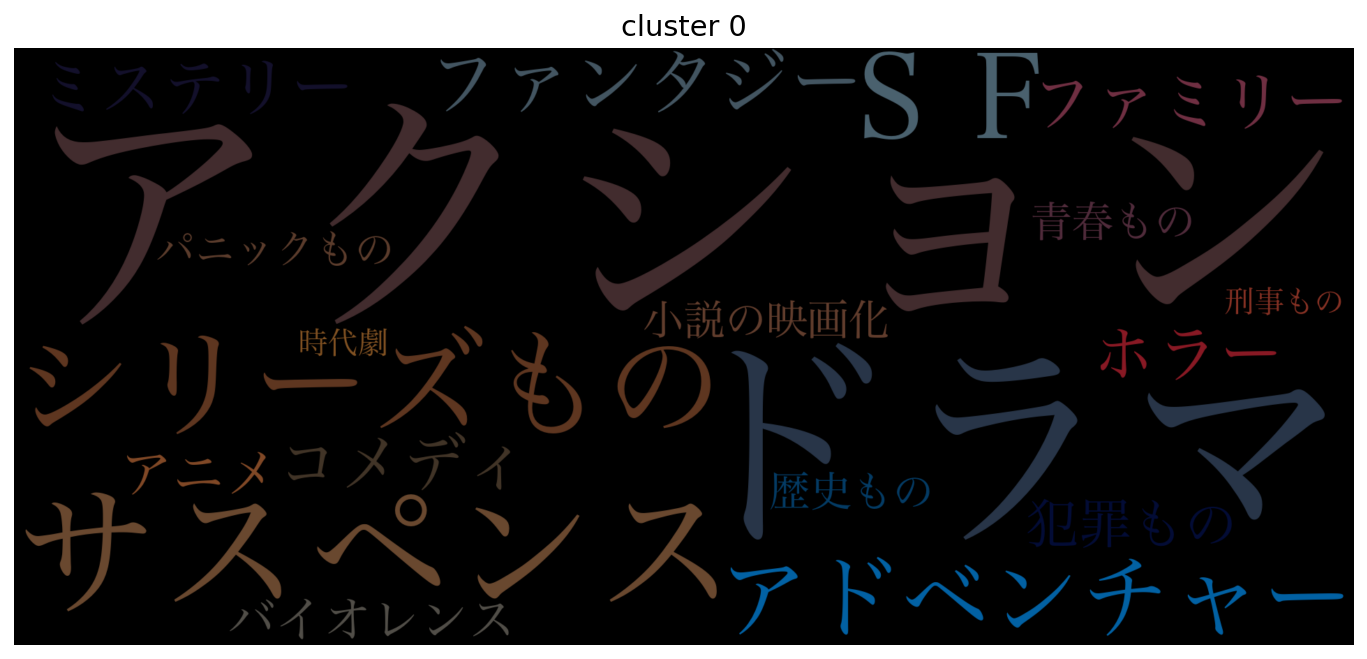

cluster 0
AVG screeningtime : 134.0
AVG movie rating : 7.2793333333333345
AVG member : 741.0


In [474]:
makeCloud(keyword_occurences,"cluster 0","lemonchiffon")
print('cluster 0\nAVG screeningtime : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c0_data['screening_time'].mean(), c0_data['mean_review_point'].mean(),c0_data['number_of_revier'].mean()))

### c1

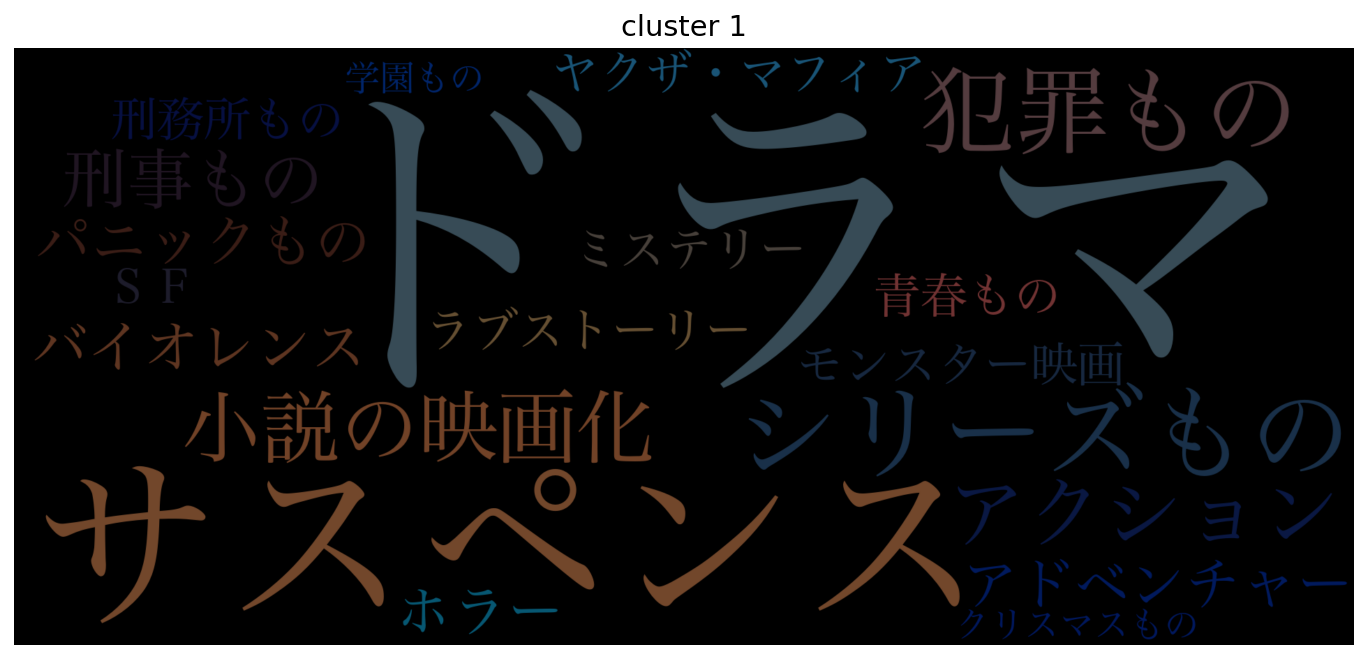

cluster 0
AVG screeningtime : 132.93333333333334
AVG movie rating : 7.859999999999999
AVG member : 519.6666666666666


[['ドラマ', 9],
 ['サスペンス', 8],
 ['シリーズもの', 7],
 ['犯罪もの', 6],
 ['小説の映画化', 6],
 ['アクション', 6],
 ['刑事もの', 4],
 ['アドベンチャー', 3],
 ['バイオレンス', 3],
 ['ホラー', 3],
 ['パニックもの', 3],
 ['ラブストーリー', 2],
 ['ミステリー', 2],
 ['ＳＦ', 2],
 ['刑務所もの', 2],
 ['青春もの', 2],
 ['ヤクザ・マフィア', 2],
 ['モンスター映画', 2],
 ['学園もの', 1],
 ['クリスマスもの', 1],
 ['スポコンもの', 1],
 ['動物もの', 1],
 ['ロマンス', 1],
 ['歴史もの', 1],
 ['スポーツもの', 1],
 ['コメディ', 1],
 ['ＴＶ映画', 0],
 ['', 0],
 ['グルメもの', 0],
 ['時代劇', 0],
 ['サイレント', 0],
 ['医学もの', 0],
 ['戦争もの', 0],
 ['オカルト映画', 0],
 ['ＴＶの映画化', 0],
 ['リメイク', 0],
 ['ゾンビ映画', 0],
 ['伝記もの', 0],
 ['アイドルもの', 0],
 ['パロディ', 0],
 ['モンド映画', 0],
 ['アニメ', 0],
 ['３Ｄ映画', 0],
 ['ファミリー', 0],
 ['ショート（短編映画）', 0],
 ['ミュージカル', 0],
 ['カンフー', 0],
 ['配信もの', 0],
 ['法廷もの', 0],
 ['モノクロ映画', 0],
 ['スパイもの', 0],
 ['ネットもの', 0],
 ['同性愛もの', 0],
 ['ファンタジー', 0],
 ['ロードムービー', 0],
 ['戯曲（舞台劇）の映画化', 0],
 ['特撮もの', 0],
 ['ゲームの映画化', 0],
 ['エロティック', 0],
 ['政治もの', 0],
 ['音楽もの', 0],
 ['実話もの', 0],
 ['オムニバス', 0],
 ['ドキュメンタリー', 0],
 ['ウエスタン', 0],
 ['CGアニメ', 0],
 ['漫画の

In [475]:
c1_movielist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = movie[movie.movie_title.isin(c1_movielist)]
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences,"cluster 1","black")
print('cluster 0\nAVG screeningtime : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c1_data['screening_time'].mean(), c1_data['mean_review_point'].mean(),c1_data['number_of_revier'].mean()))
keyword_occurences

### c2

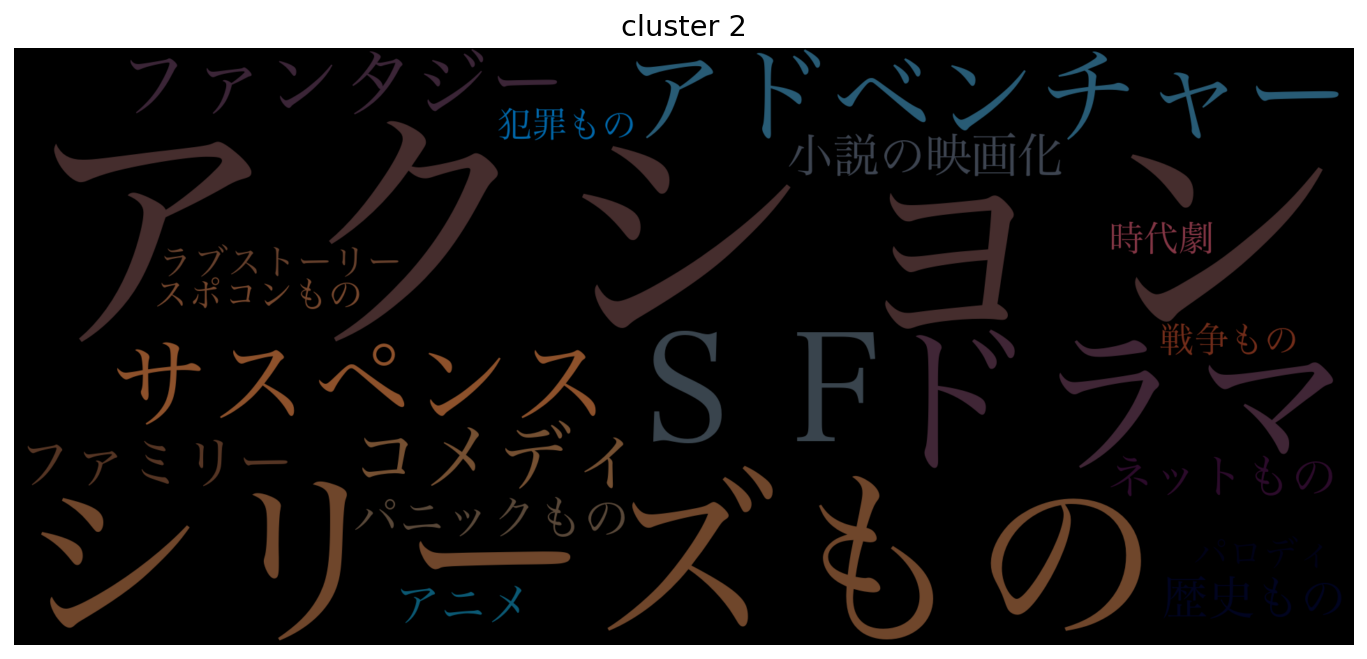

cluster 2
AVG screeningtime : 138.6
AVG movie rating : 6.797333333333335
AVG member : 745.8666666666667


In [478]:
c2_movielist = list(c2.sort_values(ascending=False)[:15].index)
c2_data = movie[movie.movie_title.isin(c2_movielist)]
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences,"cluster 2","snow")
print('cluster 2\nAVG screeningtime : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c2_data['screening_time'].mean(), c2_data['mean_review_point'].mean(),c2_data['number_of_revier'].mean()))

### c3

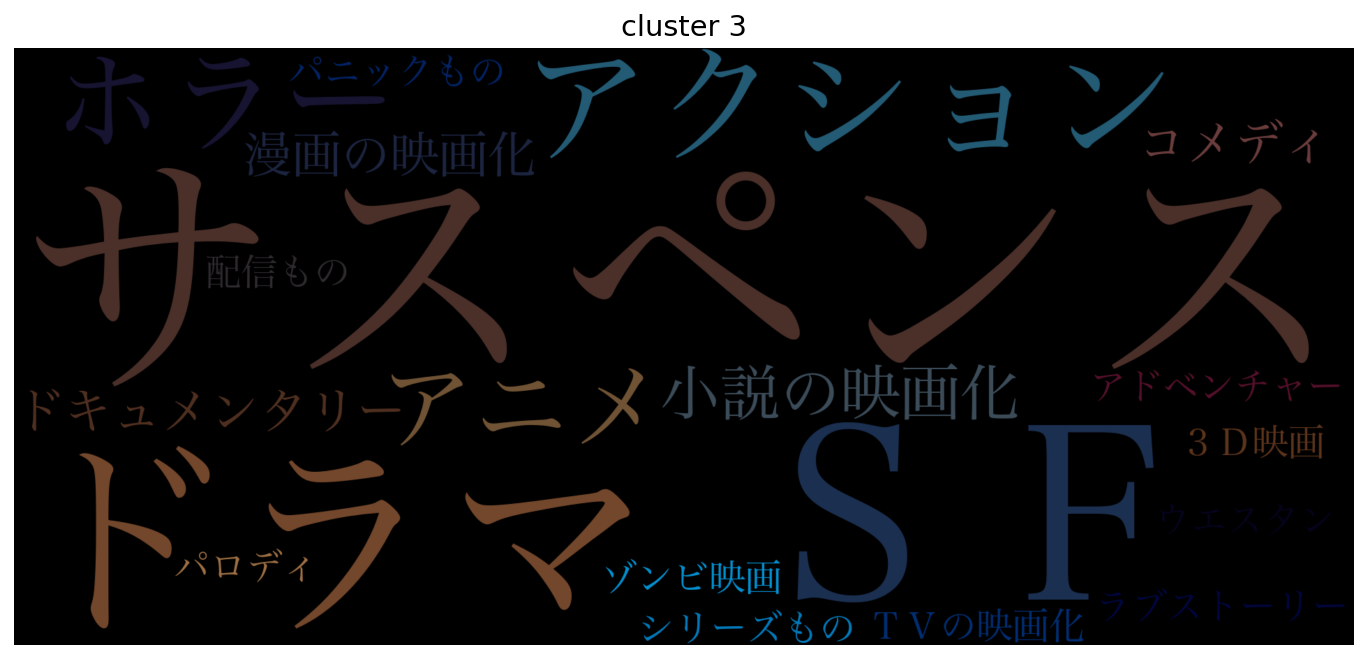

cluster 0
AVG screeningtime : 105.33333333333333
AVG movie rating : 5.5133333333333345
AVG member : 9.533333333333333


In [481]:
c3_movielist = list(c3.sort_values(ascending=False)[:15].index)
c3_data = movie[movie.movie_title.isin(c3_movielist)]
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences,"cluster 3","white")
print('cluster 0\nAVG screeningtime : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c3_data['screening_time'].mean(), c3_data['mean_review_point'].mean(),c3_data['number_of_revier'].mean()))